<a href="https://colab.research.google.com/github/jvtsp/Projeto-Aplicado-5/blob/main/Projeto_aplicado_IV_entrega_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  <img src="https://github.com/Rogerio-mack/GCF/raw/main/GCF_files/Mackenzie.jpg" width="25%" align="right"/>

  # **PROJETO APLICADO IV - Entrega 4**
  
  <br>
  <br>
  


# **Impacto da Baixa Taxa de Natalidade na Previdência Social: Um Desafio para o Futuro!**
---

In [ ]:
#@title **Identificação do Grupo e Opção do Projeto**

#@markdown Integrantes do Grupo, nome completo em ordem alfabética (*informe: \<nome\>, \<matrícula\>*)
Aluno1 = 'Douglas Pereira de Araújo, RA 10370116' #@param {type:"string"}
Aluno2 = 'Gabriel Sicari Moretti, RA 1036984' #@param {type:"string"}
Aluno3 = 'João Vitor da Silva Pereira, RA 10369433' #@param {type:"string"}
Aluno4 = 'Matheus Aparecido Ramos Lourenço, RA 10368895' #@param {type:"string"}
Aluno5 = 'Rafael Castro dos Santos, RA 10368801' #@param {type:"string"}





# **Resumo**
O projeto tem como objetivo analisar, por meio de séries históricas, os gastos do governo com a previdência social em relação às despesas, além de investigar o impacto da baixa natalidade na arrecadação e, consequentemente, os possíveis efeitos no regime previdenciário. Será utilizada uma abordagem analítica para compreender melhor essas dinâmicas e antecipar desafios futuros relacionados à sustentabilidade do sistema previdenciário.

# **Fonte dos Dados**

Os dados sobre projeção da população são obtidos através do [Instituto Brasileiro de Geografia e Estatística (IBGE)](https://www.ibge.gov.br/estatisticas/sociais/populacao/9109-projecao-da-populacao.html), uma instituição governamental responsável pela produção e análise de estatísticas no Brasil.

As projeções populacionais fornecem estimativas do tamanho e da estrutura etária da população brasileira para os anos futuros, baseadas em dados demográficos históricos e em modelos estatísticos. As tabelas analisadas são:

- Projeções da população por sexo e idades
- Tábuas de Mortalidade 2010/2060

Os dados fornecidos pela Previdência Social do Brasil apresentam os resultados do Regime Geral de Previdência Social (RGPS), abrangendo informações sobre benefícios concedidos, arrecadação, despesas e saldo do sistema previdenciário.

Para acessar os dados da projeção populacional, você pode visitar o [link](https://www.ibge.gov.br/estatisticas/sociais/populacao/9109-projecao-da-populacao.html).

Para mais informações sobre os dados públicos da Previdência Social do Brasil, acesse [aqui](http://www.ipeadata.gov.br/Default.aspx).


# **Introdução**
A previdência social é fundamental na estrutura de segurança social de qualquer nação, oferecendo proteção contra os riscos financeiros associados à velhice, incapacidade e perda de renda. Porém, este sistema enfrenta uma ameaça significativa devido às tendências demográficas em curso, em particular a baixa taxa de natalidade. Esta tendência tem implicações profundas não apenas para a dinâmica populacional, mas também para a viabilidade econômica dos sistemas previdenciários. À medida que entramos em uma era de mudanças demográficas, com as taxas de natalidade caindo abaixo dos níveis de reposição em muitos países, enfrentamos um desafio inédito: a sustentabilidade de longo prazo da previdência social. Neste contexto, vamos examinar como a diminuição das taxas de natalidade influenciará a razão de dependência — a proporção de pessoas não trabalhadoras (jovens e idosos) em relação àquelas em idade ativa — e o que isso significa para o financiamento da previdência social. Tais questões envolvem fatores econômicos, sociais e políticos que vão desde as políticas de incentivo à natalidade até a reforma das estruturas de previdência e aposentadoria.

1. Análise exploratória de dados do IBGE: Exploração das bases de dados do IBGE sobre natalidade em diferentes faixas etárias de 2010 até 2060.
2. Análise histórica de arrecadação vs despesas: Estudo da evolução da arrecadação e despesas da previdência social de 1982 a 2015.
3. Modelo SARIMA para previsão futura: Aplicação do modelo SARIMA para prever valores futuros com base em padrões históricos.
4. Considerações finais: Reflexão sobre os resultados obtidos pelo modelo e suas implicações.

# **Referencial Teórico**
Trabalhos Correlacionados e Alternativas de Solução

O fenômeno do envelhecimento populacional e suas repercussões no sistema de previdência social têm sido objeto de estudo em diversas disciplinas, incluindo economia, demografia e políticas públicas. Lee e Mason (2010) exploram em detalhes a dinâmica da transição demográfica e a sustentabilidade fiscal dos sistemas previdenciários, destacando a importância do equilíbrio entre as taxas de natalidade e as obrigações previdenciárias. Uma das soluções propostas é a implementação de políticas que promovam o aumento da taxa de natalidade, como incentivos financeiros e subsídios para famílias com crianças, algo que tem sido tentado em países como Japão e Alemanha (OECD, 2017).

Outra alternativa inclui a reforma dos sistemas de previdência para adaptá-los à nova realidade demográfica. Por exemplo, a Suécia reformou seu sistema de previdência, introduzindo um modelo de contas individuais de contribuição definida, que se ajustam automaticamente à expectativa de vida (Palmer, 2000). Embora essa solução tenha aumentado a sustentabilidade do sistema, ela também transferiu uma maior responsabilidade para os indivíduos no planejamento de sua aposentadoria.

Principais Conceitos Envolvidos

Os principais conceitos envolvidos na análise do impacto da baixa taxa de natalidade na previdência social incluem a razão de dependência, que é a relação entre a população não produtiva (idosos e jovens) e a população produtiva (em idade de trabalhar), e a taxa de substituição, que indica a proporção do salário de um trabalhador que é substituído pela pensão de aposentadoria (Bloom, Canning, & Sevilla, 2003).

# **Diagrama de Solução**


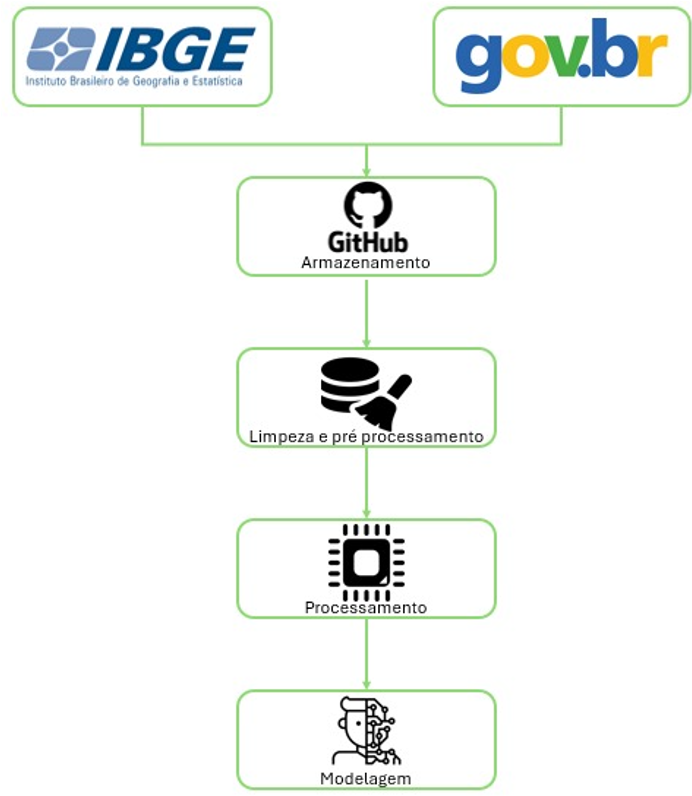


# **EDA e Pré-processamento dos dados**

Importe das bases

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import warnings

import numpy as np
from sklearn.model_selection import ParameterSampler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


In [ ]:
# prompt: ignorar os ValueWarning

warnings.filterwarnings("ignore")


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# conexão com o drive:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Define o nome da aba do arquivo Excel que contém os dados de população
nome_aba = 'Formatado'
# Lê os dados de população do arquivo Excel e armazena em um DataFrame
populacao = pd.read_excel('/content/drive/MyDrive/Projeto_aplicado/dados/projecoes_populacao_2010_2060.xls', sheet_name=nome_aba)


In [ ]:
# Verificando cabeçado para análise preliminar
populacao.head()

,GRUPO_ETARIO,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060
0,Total,194890682,196603732,198314934,200004188,201717541,203475683,205156587,206804741,208494900,210147125,211755692,213317639,214828540,216284269,217684462,219029093,220316530,221545234,222713669,223821305,224868462,225854415,226777802,227638581,228437122,229173685,229847832,230459062,231007871,231494650,231919922,232284233,232588580,232834065,233020996,233149625,233220257,233233670,233190482,233090464,232933276,232719169,232448867,232122448,231739632,231300323,230805223,230255685,229652286,228995541,228286347
1,0-4,14858280,14697433,14624301,14567170,14570070,14677159,14715112,14720776,14787557,14798332,14730311,14703281,14675523,14569055,14452355,14326234,14192256,14053426,13912226,13770272,13629815,13491399,13354905,13221642,13092489,12967369,12846604,12730937,12620549,12514918,12413588,12316709,12225086,12138798,12057106,11979238,11904624,11832490,11761709,11691308,11620256,11547982,11473958,11397201,11317212,11233863,11147191,11057520,10965028,10870292,10774218
2,5-9,15865195,15600504,15387507,15203145,15029641,14824271,14664918,14593299,14537829,14542132,14650311,14689394,14695773,14762671,14773628,14705941,14679311,14652033,14546208,14430226,14304778,14171490,14033278,13892710,13751331,13611405,13473529,13337523,13204728,13076037,12951361,12830995,12715703,12605672,12500387,12399373,12302790,12211456,12125433,12043993,11966376,11891973,11820071,11749531,11679356,11608504,11536459,11462615,11386046,11306224,11223031
3,10-14,17397304,17216843,16880174,16495325,16131984,15840860,15577214,15365237,15182024,15009676,14805478,14647164,14576191,14520972,14525347,14633526,14672711,14679300,14746432,14757724,14690423,14664114,14637176,14531700,14416109,14291049,14158125,14020272,13880038,13738984,13599376,13461829,13326122,13193611,13065182,12940762,12820626,12705545,12595720,12490655,12389855,12293466,12202305,12116445,12035156,11957694,11883455,11811703,11741278,11671246,11600532
4,15-19,17219086,17238401,17315601,17402809,17424089,17334096,17155615,16821630,16439846,16079464,15790863,15529387,15318916,15136923,14965724,14762869,14605891,14536019,14481942,14487286,14596110,14635967,14643187,14710785,14722659,14656163,14630405,14603997,14499263,14384409,14260078,14127872,13990752,13851207,13710840,13571863,13434947,13299846,13167907,13040010,12916108,12796510,12681921,12572557,12467934,12367551,12271531,12180736,12095228,12014265,11937109


In [ ]:
populacao.describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,1.948907e+07,1.966037e+07,1.983149e+07,2.000042e+07,2.017175e+07,2.034757e+07,2.051566e+07,2.068047e+07,2.084949e+07,2.101471e+07,2.117557e+07,2.133176e+07,2.148285e+07,2.162843e+07,2.176845e+07,2.190291e+07,2.203165e+07,2.215452e+07,2.227137e+07,2.238213e+07,2.248685e+07,2.258544e+07,2.267778e+07,2.276386e+07,2.284371e+07,2.291737e+07,2.298478e+07,2.304591e+07,2.310079e+07,2.314946e+07,2.319199e+07,2.322842e+07,2.325886e+07,2.328341e+07,2.330210e+07,2.331496e+07,2.332203e+07,2.332337e+07,2.331905e+07,2.330905e+07,2.329333e+07,2.327192e+07,2.324489e+07,2.321224e+07,2.317396e+07,2.313003e+07,2.308052e+07,2.302557e+07,2.296523e+07,2.289955e+07,2.282863e+07
std,4.173993e+07,4.209354e+07,4.244653e+07,4.279494e+07,4.314868e+07,4.351207e+07,4.385889e+07,4.419855e+07,4.454741e+07,4.488832e+07,4.521993e+07,4.554160e+07,4.585226e+07,4.615134e+07,4.643877e+07,4.671446e+07,4.697805e+07,4.722911e+07,4.746758e+07,4.769337e+07,4.790643e+07,4.810662e+07,4.829352e+07,4.846738e+07,4.862830e+07,4.877622e+07,4.891107e+07,4.903261e+07,4.914120e+07,4.923691e+07,4.931977e+07,4.938988e+07,4.944733e+07,4.949259e+07,4.952570e+07,4.954664e+07,4.955547e+07,4.955221e+07,4.953723e+07,4.951045e+07,4.947173e+07,4.942109e+07,4.935859e+07,4.928444e+07,4.919855e+07,4.910081e+07,4.899138e+07,4.887044e+07,4.873828e+07,4.859500e+07,4.844071e+07
min,4.551910e+05,4.591660e+05,4.846030e+05,5.212520e+05,5.623490e+05,6.035800e+05,6.453770e+05,6.886570e+05,7.319450e+05,7.743040e+05,8.151650e+05,8.562110e+05,8.987230e+05,9.434660e+05,9.916630e+05,1.043410e+06,1.099461e+06,1.161212e+06,1.225853e+06,1.289978e+06,1.352102e+06,1.414477e+06,1.478371e+06,1.546036e+06,1.620691e+06,1.703785e+06,1.795039e+06,1.894806e+06,2.001669e+06,2.113776e+06,2.229906e+06,2.350808e+06,2.476780e+06,2.607627e+06,2.743377e+06,2.883626e+06,3.028143e+06,3.176612e+06,3.328257e+06,3.482333e+06,3.637926e+06,3.794831e+06,3.953061e+06,4.110366e+06,4.263976e+06,4.412193e+06,4.556131e+06,4.697023e+06,4.833076e+06,4.962058e+06,5.083408e+06
25%,4.627502e+06,4.793975e+06,4.982774e+06,5.189864e+06,5.408465e+06,5.634296e+06,5.867426e+06,6.106814e+06,6.352430e+06,6.604857e+06,6.864099e+06,7.128525e+06,7.396489e+06,7.667064e+06,7.939250e+06,8.211845e+06,8.483724e+06,8.754406e+06,9.019696e+06,9.273799e+06,9.513144e+06,9.738821e+06,9.952428e+06,1.015198e+07,1.033473e+07,1.050053e+07,1.065015e+07,1.078105e+07,1.091005e+07,1.106220e+07,1.125265e+07,1.147724e+07,1.172235e+07,1.168517e+07,1.165981e+07,1.165019e+07,1.165450e+07,1.167221e+07,1.169784e+07,1.178710e+07,1.187985e+07,1.180598e+07,1.173354e+07,1.166145e+07,1.158882e+07,1.151484e+07,1.143914e+07,1.136134e+07,1.134578e+07,1.136784e+07,1.143974e+07
50%,1.258830e+07,1.276474e+07,1.292018e+07,1.306756e+07,1.322628e+07,1.340894e+07,1.361262e+07,1.383594e+07,1.390956e+07,1.398810e+07,1.415141e+07,1.428879e+07,1.442260e+07,1.454501e+07,1.448885e+07,1.447988e+07,1.439907e+07,1.429472e+07,1.440641e+07,1.445876e+07,1.445044e+07,1.435251e+07,1.424942e+07,1.416364e+07,1.434703e+07,1.441038e+07,1.430555e+07,1.420361e+07,1.410828e+07,1.404185e+07,1.414649e+07

In [ ]:
# Função para calcular estatísticas descritivas para cada grupo etário
def estatisticas_descritivas(data):
    grupos_etarios = data['GRUPO_ETARIO'].unique()
    estatisticas = {}

    for grupo in grupos_etarios:
        grupo_data = data[data['GRUPO_ETARIO'] == grupo]
        grupo_data = grupo_data.drop(columns='GRUPO_ETARIO').transpose()
        grupo_data.columns = [grupo]
        estatisticas[grupo] = grupo_data.describe()

    return estatisticas

# Calcula estatísticas descritivas para cada grupo etário
estatisticas = estatisticas_descritivas(populacao)

# Exemplo: estatísticas descritivas para o grupo "Total"
print(estatisticas['Total'])


              Total
count  5.100000e+01
mean   2.227894e+08
std    1.171204e+07
min    1.948907e+08
25%    2.155564e+08
50%    2.284371e+08
75%    2.320212e+08
max    2.332337e+08


Tendência Central: A média e a mediana estão relativamente próximas (222.789.400 e 228.437.100, respectivamente), o que sugere que a distribuição dos dados não é altamente assimétrica, embora a mediana ser um pouco maior que a média possa indicar uma leve inclinação para valores maiores.

Dispersão: O desvio padrão de aproximadamente 11.712.040 indica uma variabilidade considerável na população total ao longo dos anos. Essa variabilidade pode ser influenciada por diversos fatores, como taxas de natalidade e mortalidade, migração, políticas governamentais, entre outros.

Distribuição dos Dados:

A diferença entre o valor mínimo (194.890.700) e o valor máximo (233.233.700) é significativa, indicando uma faixa ampla na população total.
Os quartis ajudam a entender a distribuição dos dados. Com 25% dos anos abaixo de 215.556.400 e 75% dos anos abaixo de 232.021.200, podemos inferir que a maior parte da população total ao longo dos anos está concentrada entre esses valores.

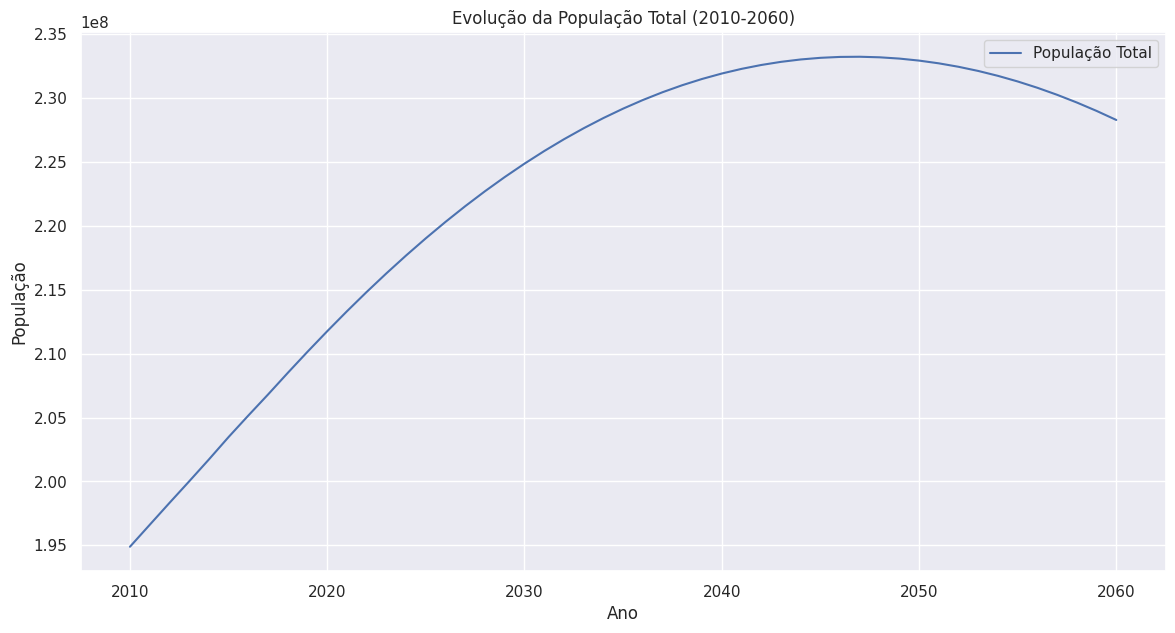

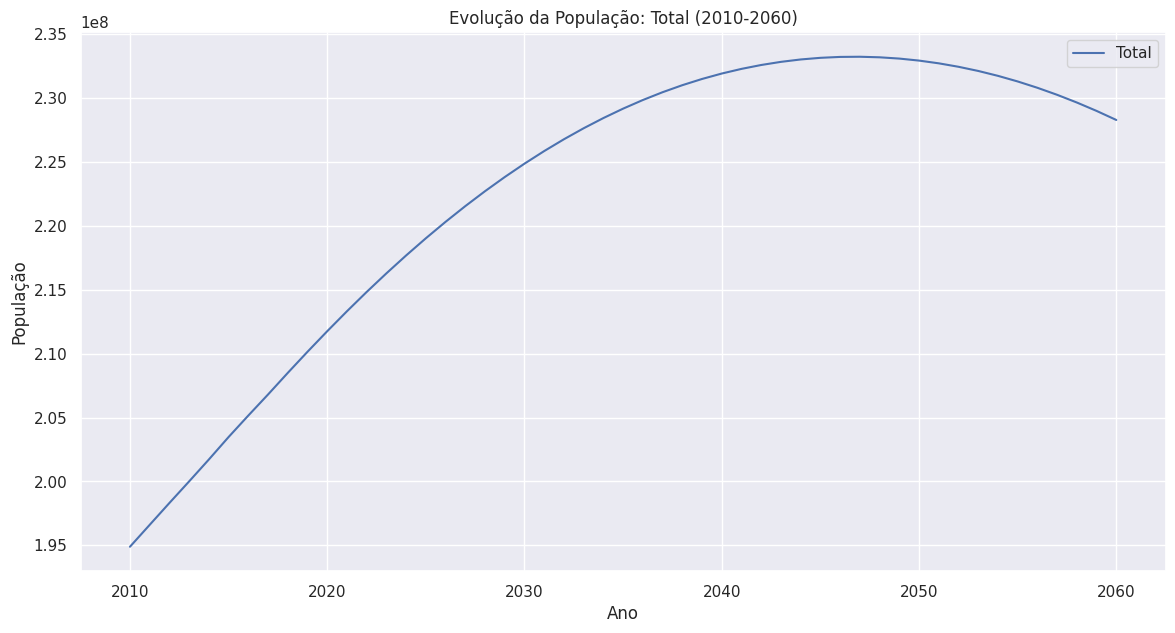

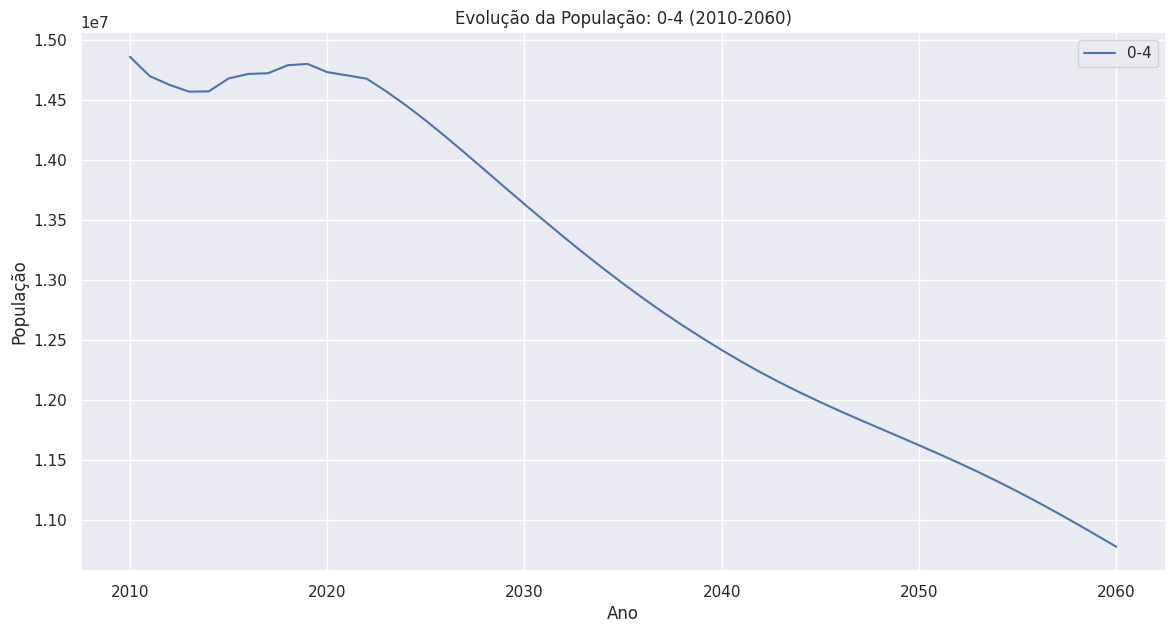

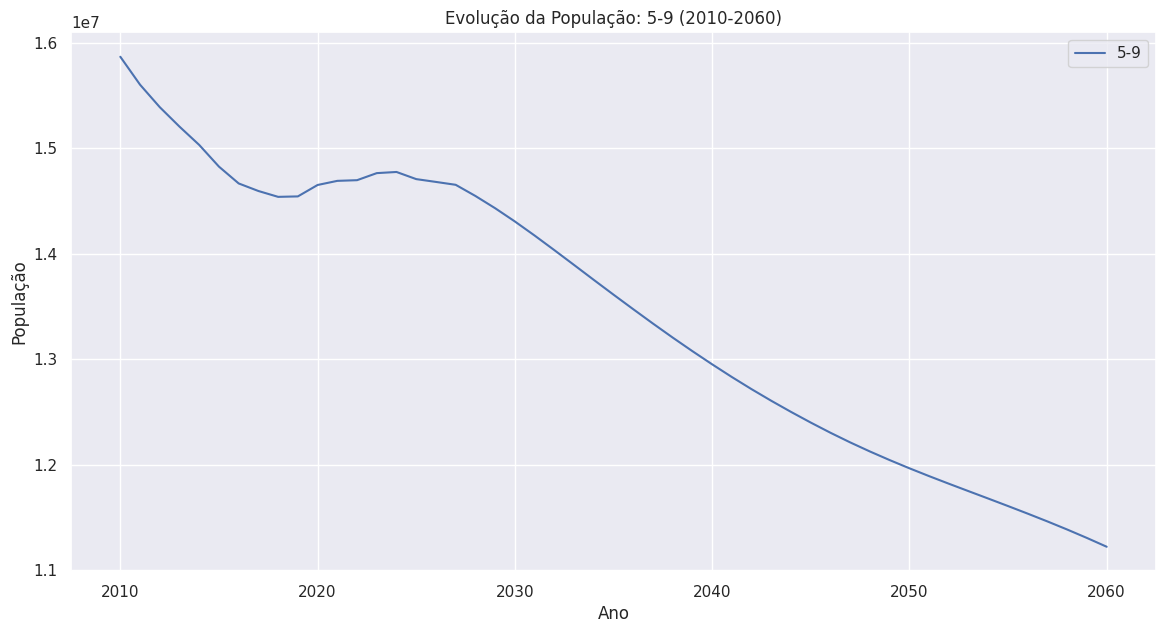

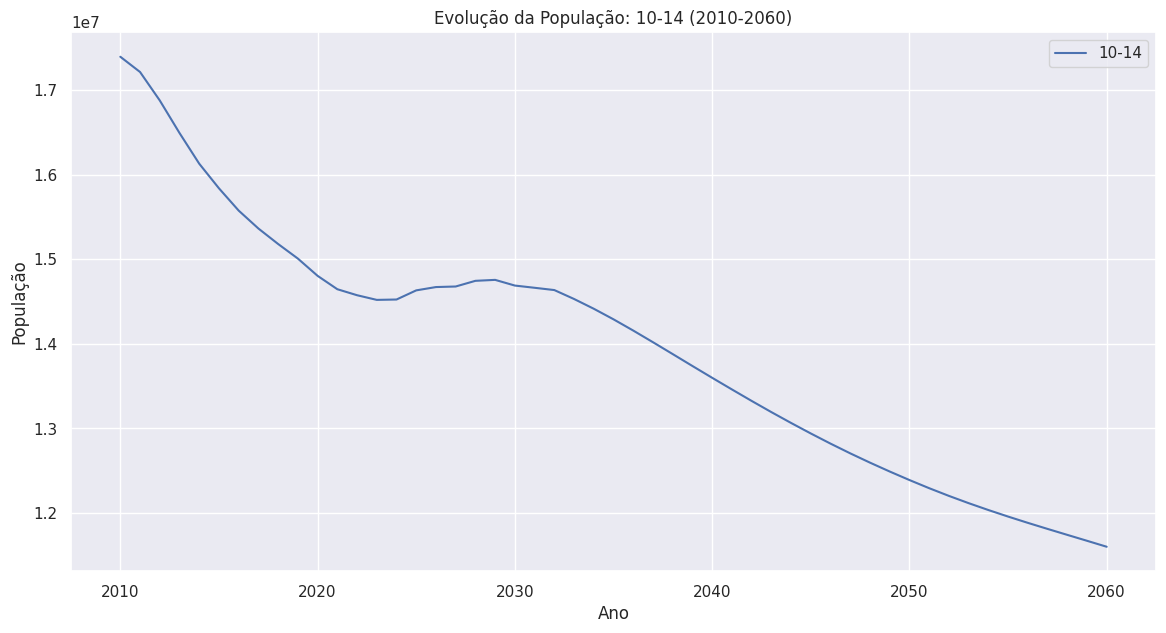

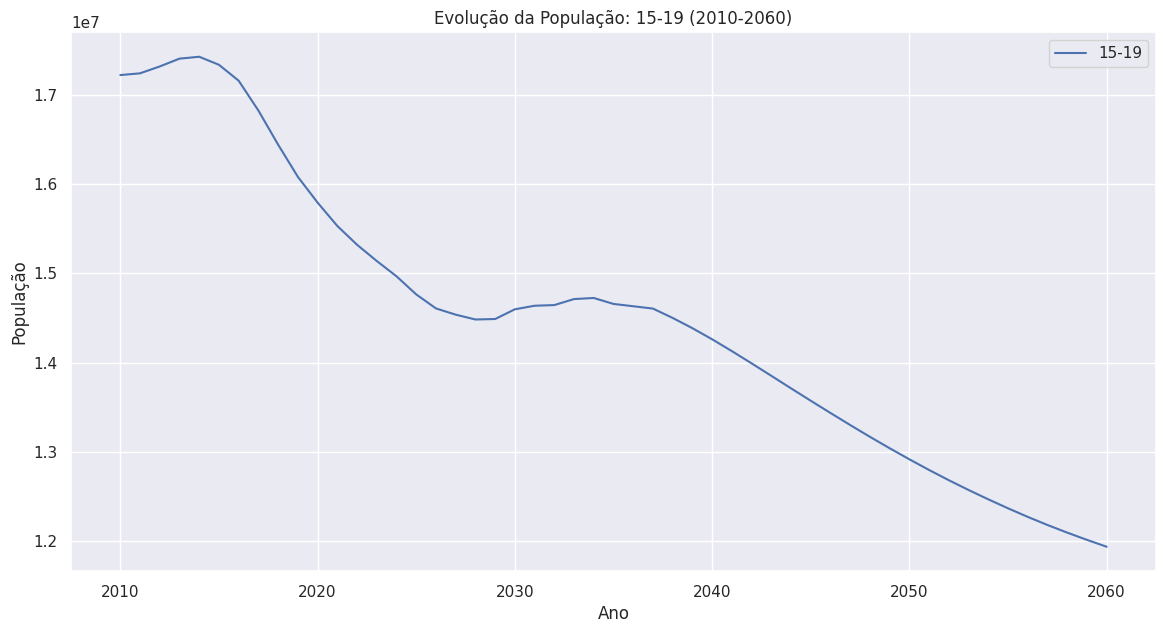

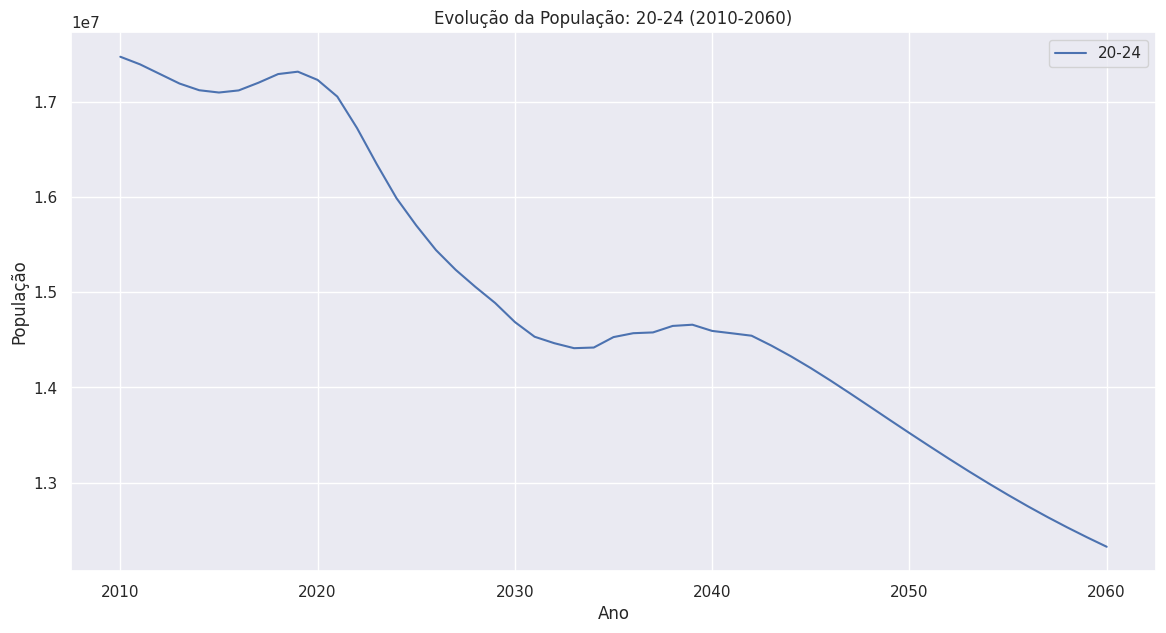

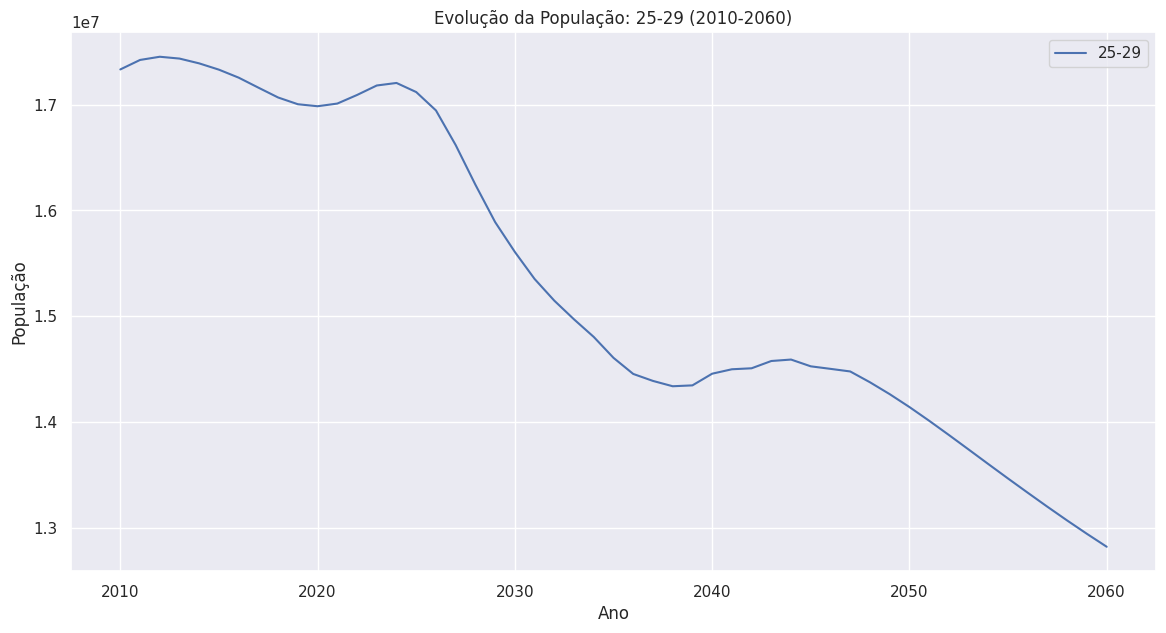

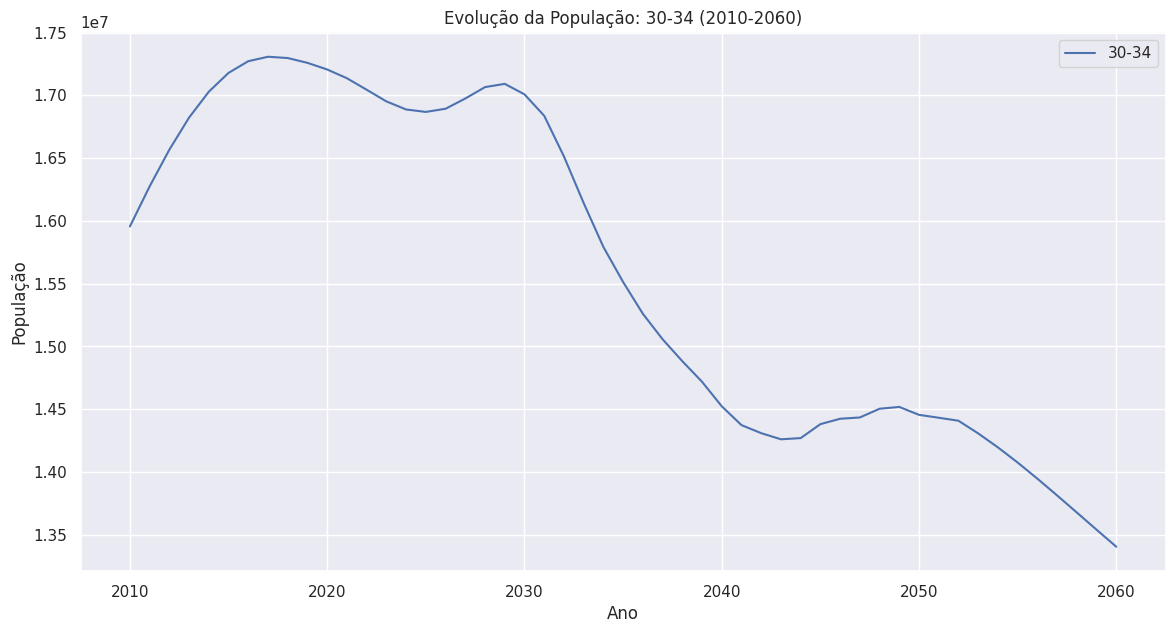

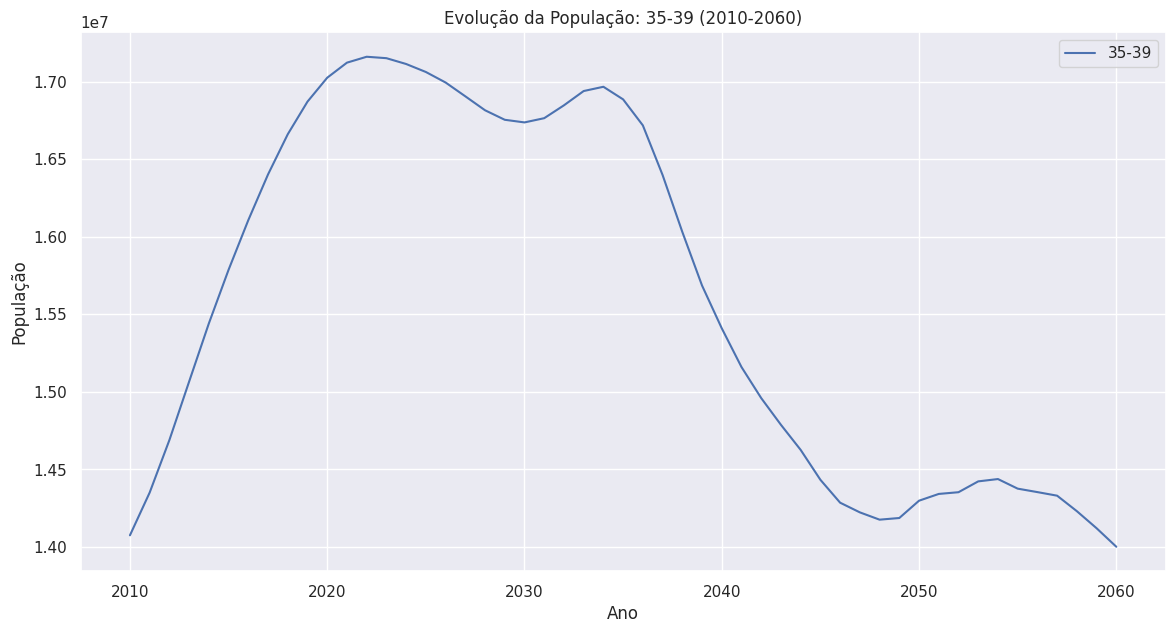

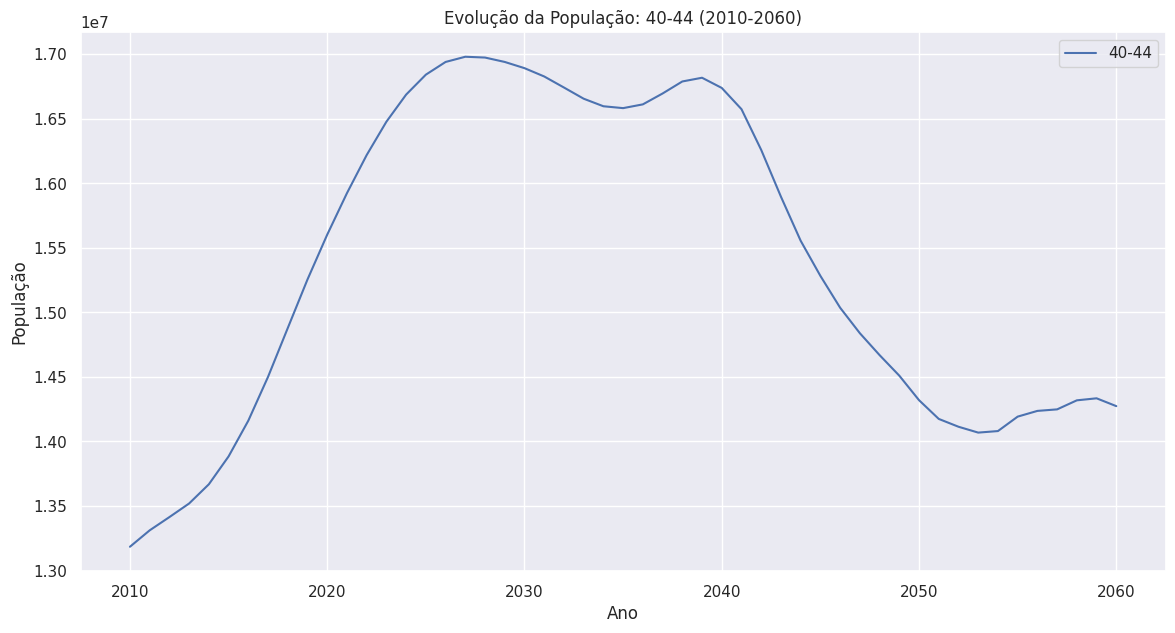

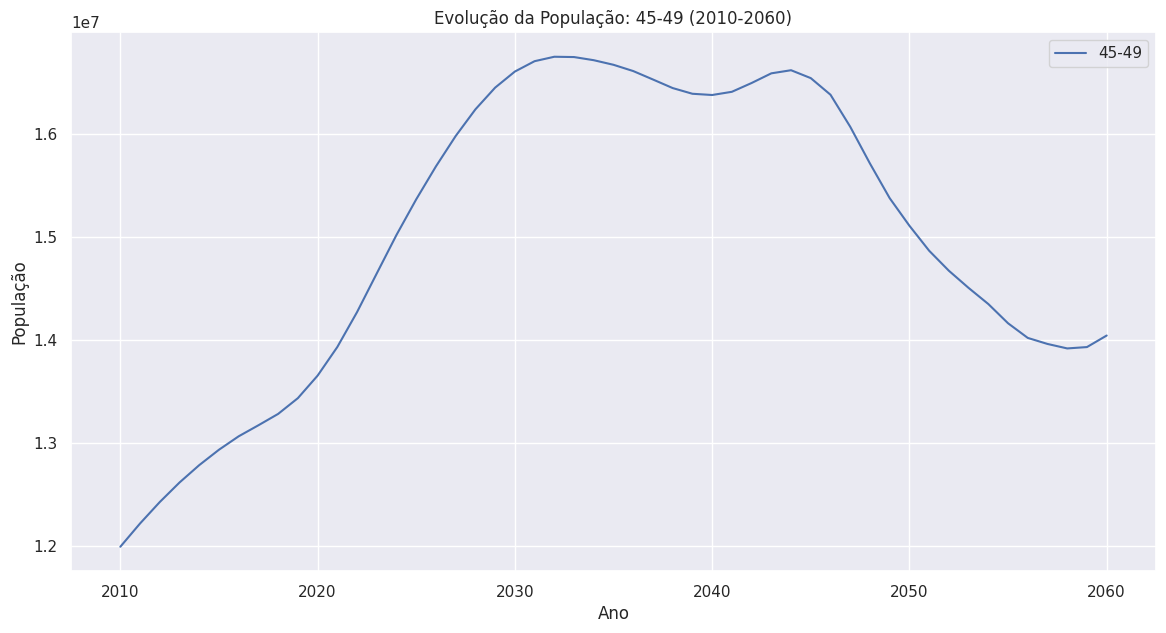

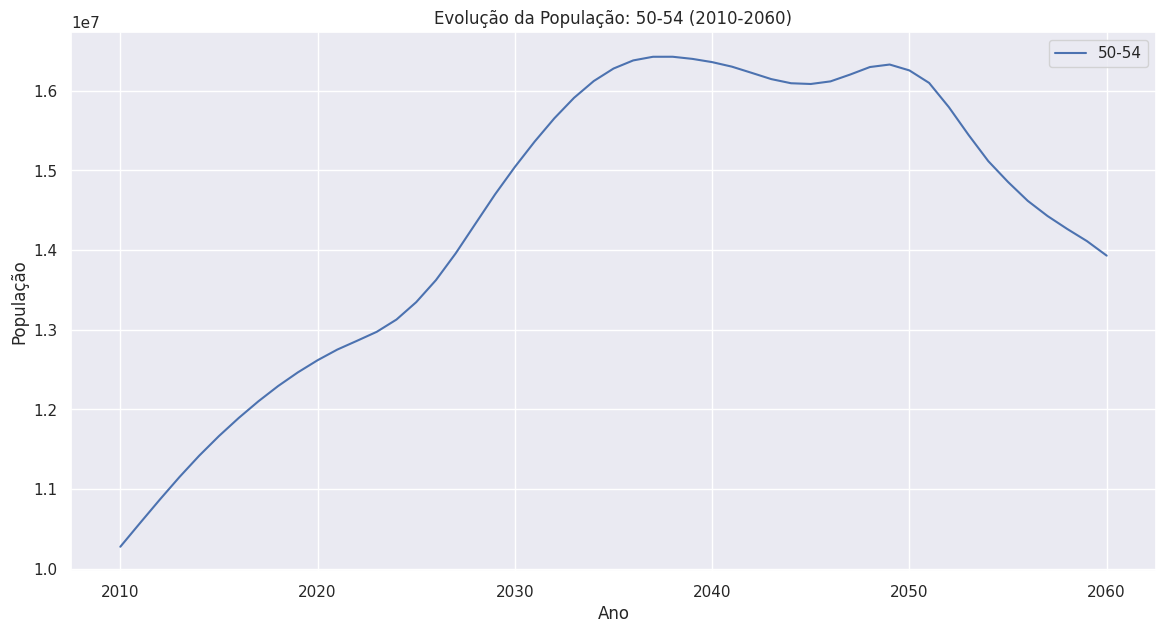

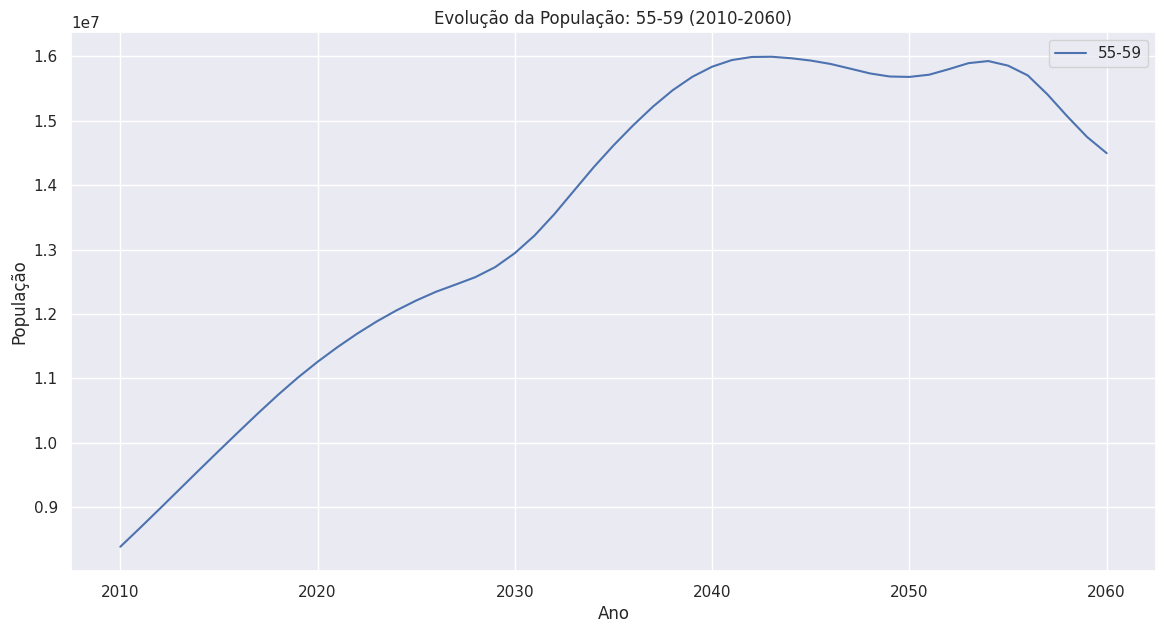

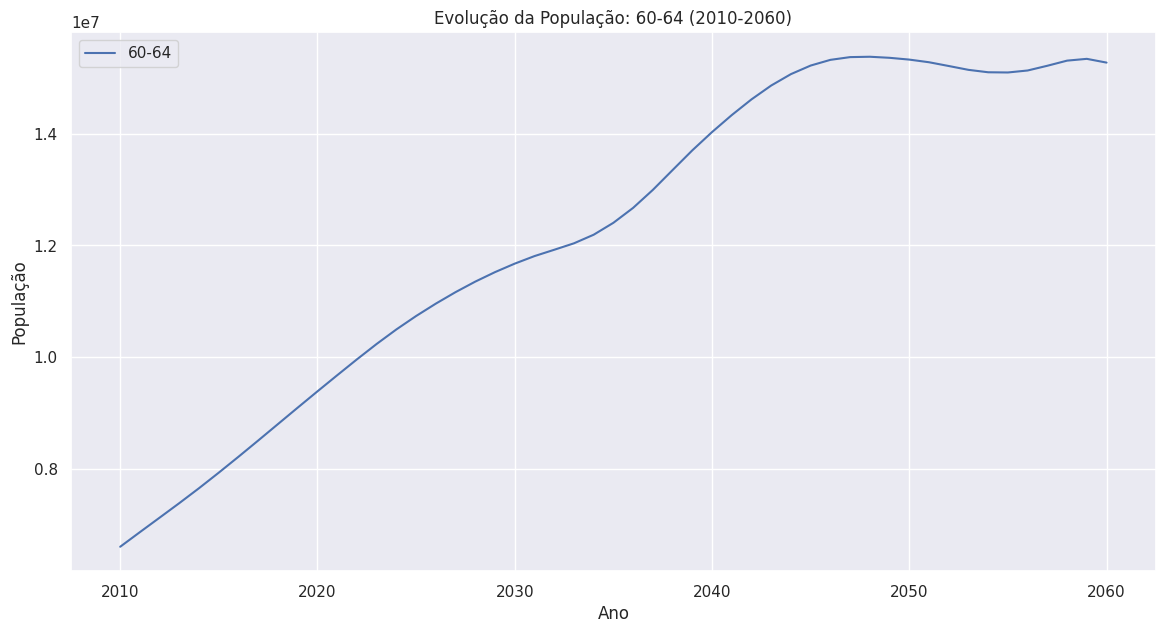

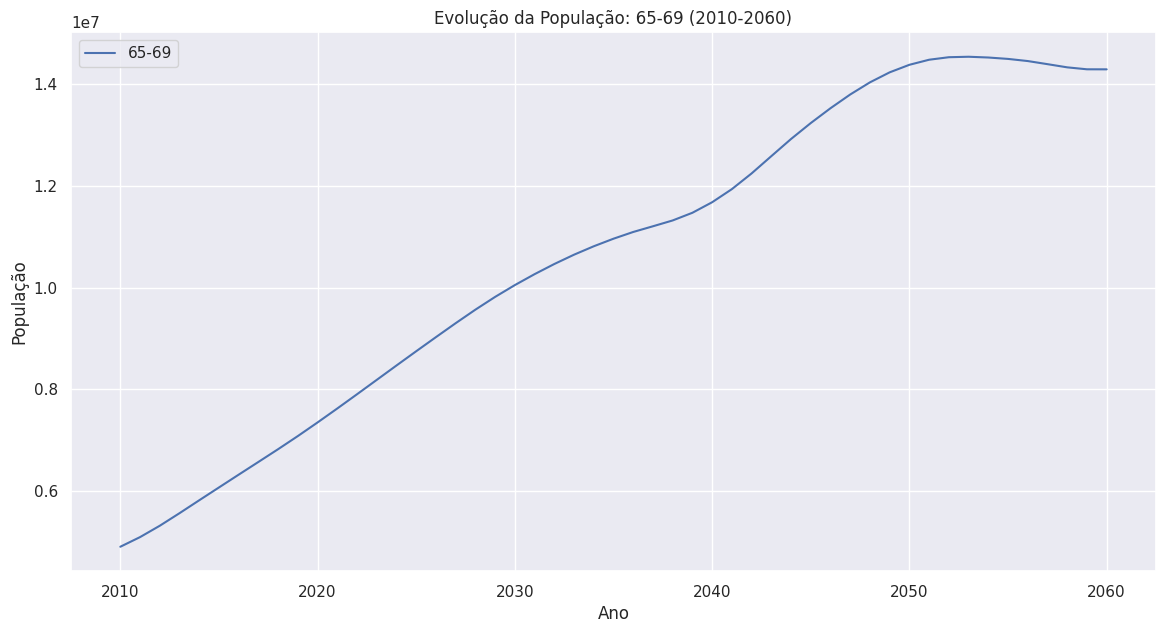

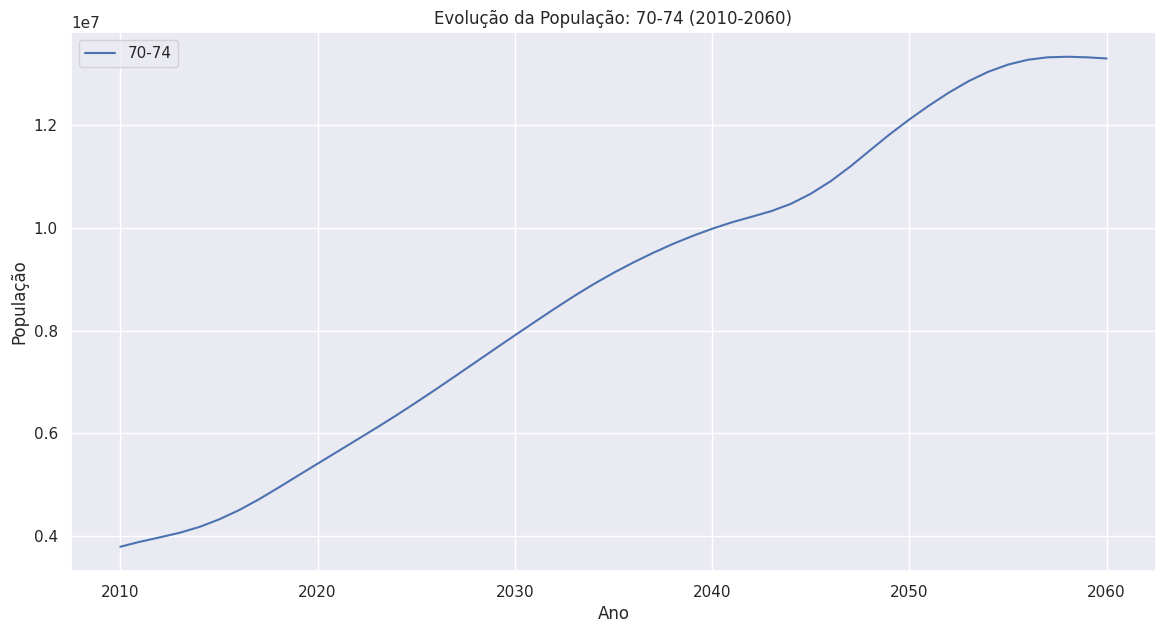

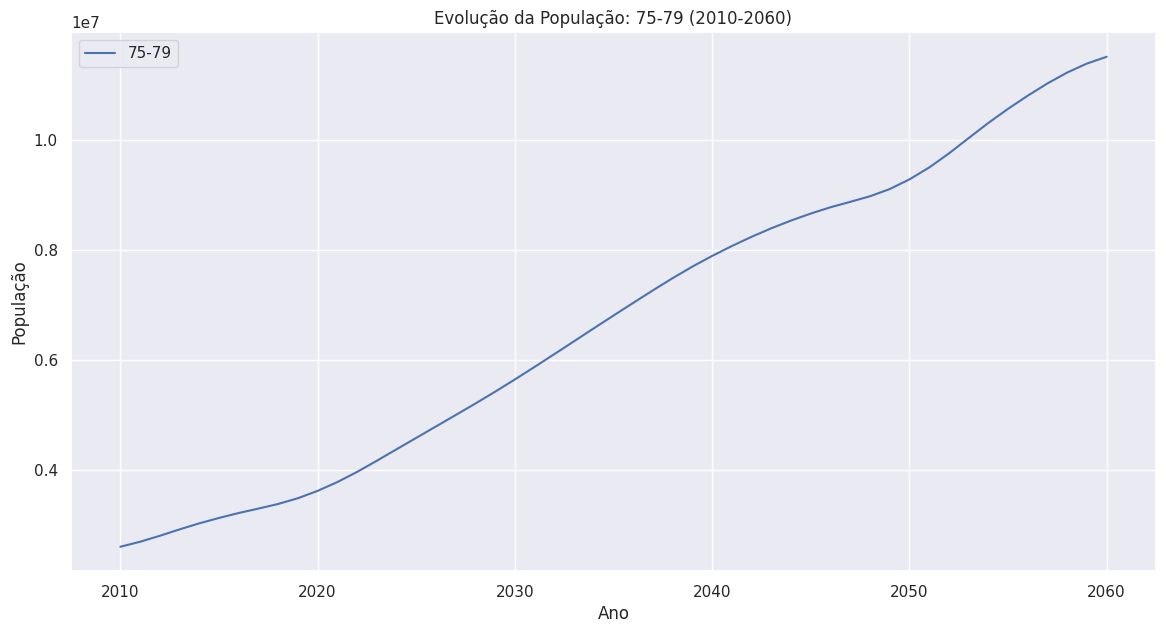

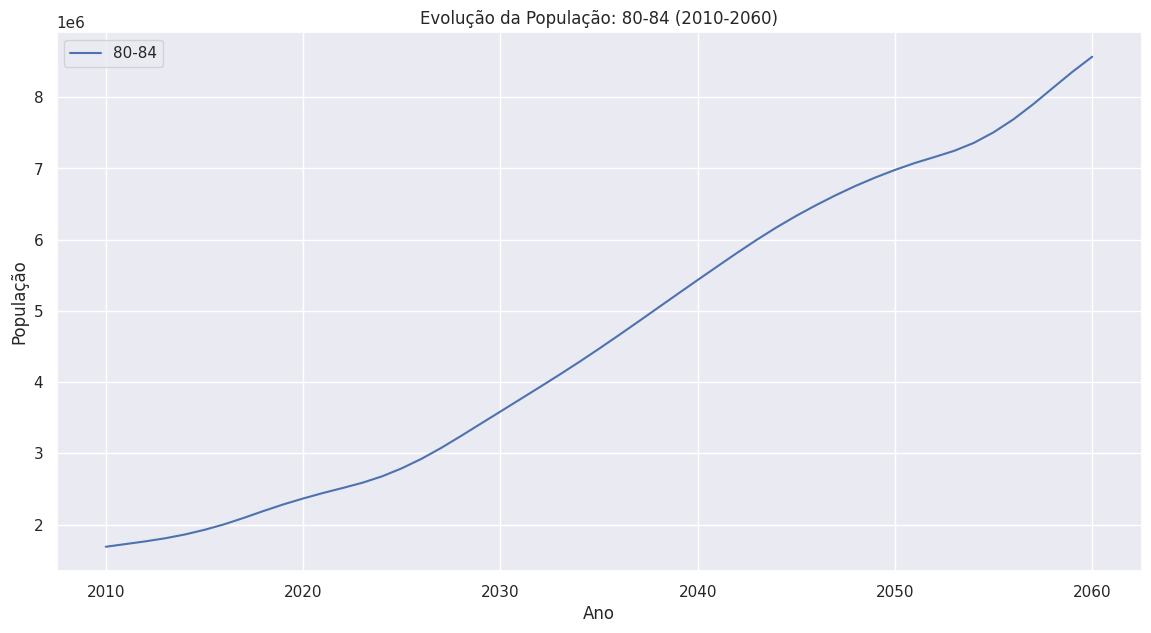

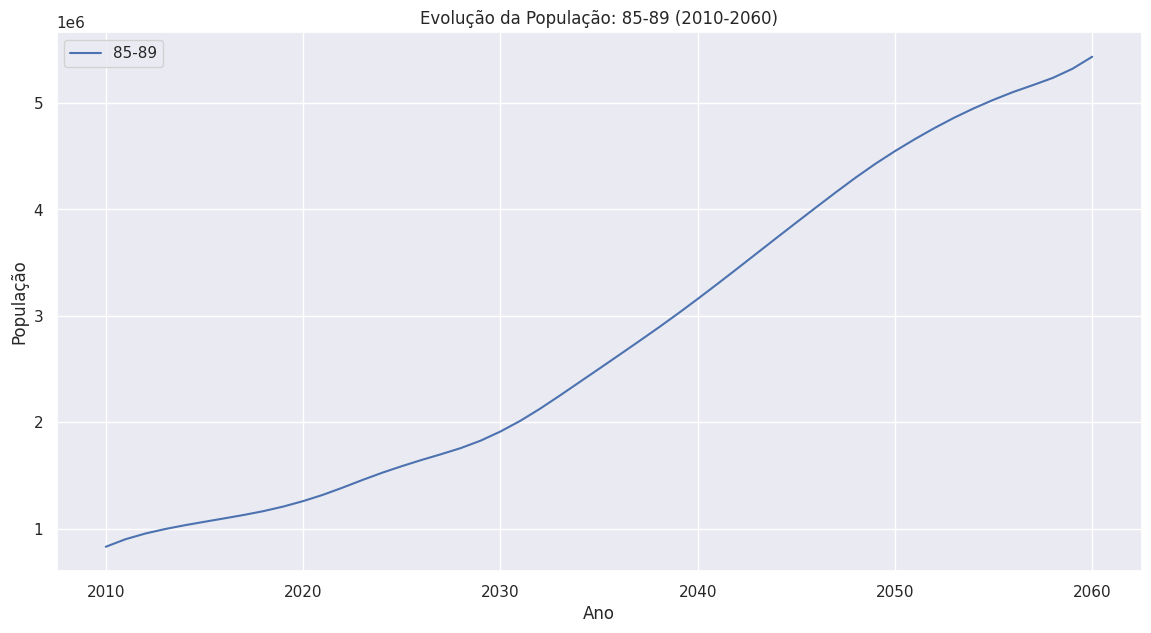

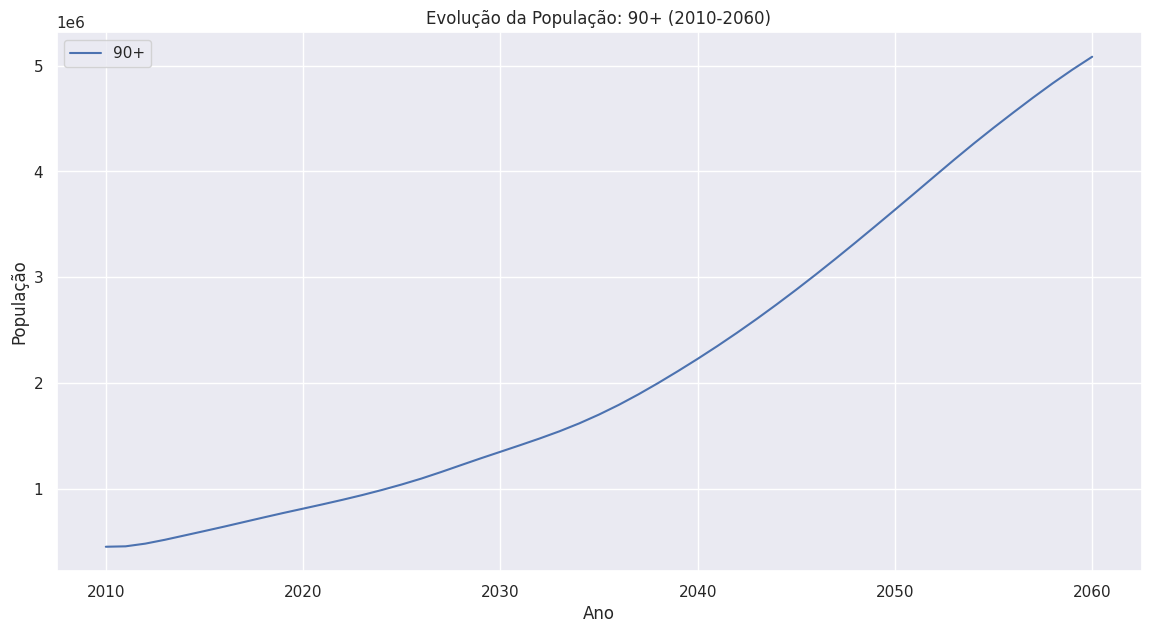

In [ ]:
# Configura o estilo dos gráficos
sns.set(style="darkgrid")

# Gráfico de linha para visualização da população total ao longo do tempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=populacao[populacao['GRUPO_ETARIO'] == 'Total'].drop(columns='GRUPO_ETARIO').transpose(), legend='full')
plt.title('Evolução da População Total (2010-2060)')
plt.xlabel('Ano')
plt.ylabel('População')
plt.legend(['População Total'])
plt.show()

# Gráficos de linha para cada grupo etário
grupos_etarios = populacao['GRUPO_ETARIO'].unique()

for grupo in grupos_etarios:
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=populacao[populacao['GRUPO_ETARIO'] == grupo].drop(columns='GRUPO_ETARIO').transpose(), legend='full')
    plt.title(f'Evolução da População: {grupo} (2010-2060)')
    plt.xlabel('Ano')
    plt.ylabel('População')
    plt.legend([grupo])
    plt.show()

O gráfico apresentado ilustra a evolução da estrutura etária da população brasileira entre os anos de 2010 e 2060, por meio de linhas que representam distintas faixas etárias. A análise detalhada do gráfico permite identificar diversos aspectos relevantes sobre o envelhecimento populacional do país:

**Envelhecimento Populacional:**

Decréscimo da proporção de crianças e jovens: As linhas que representam as faixas etárias mais jovens (0-4, 5-9 e 10-14 anos) apresentam uma tendência decrescente ao longo do período, indicando uma diminuição da fecundidade e da natalidade no Brasil. Esse declínio é um dos principais fatores que contribuem para o envelhecimento populacional.
Aumento da proporção de adultos: As linhas que representam as faixas etárias entre 20 e 59 anos apresentam uma trajetória relativamente estável ao longo do período, com algumas flutuações. Isso indica que a proporção de adultos na população brasileira se manteve relativamente constante nas últimas décadas.
Crescimento da proporção de idosos: As linhas que representam as faixas etárias acima de 60 anos apresentam um crescimento significativo ao longo do período. Isso indica que a proporção de idosos na população brasileira está aumentando consideravelmente, o que é um dos principais desafios socioeconômicos do país.

In [ ]:
# Função para realizar o teste de Dickey-Fuller Aumentado (ADF)
def adf_test(series, title=''):
    print(f'Resultados do Teste Dickey-Fuller Aumentado: {title}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

# Realiza o teste ADF para a população total
populacao_total = populacao[populacao['GRUPO_ETARIO'] == 'Total'].drop(columns='GRUPO_ETARIO').transpose()
adf_test(populacao_total, title='População Total')


Resultados do Teste Dickey-Fuller Aumentado: População Total
Test Statistic                 -0.285639
p-value                         0.927514
#Lags Used                      7.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


O teste Dickey-Fuller Aumentado (ADF) é um teste estatístico utilizado para verificar a estacionaridade de uma série temporal. Em outras palavras, ele nos ajuda a determinar se uma série temporal tem uma tendência constante ao longo do tempo ou se ela apresenta características de estacionaridade, onde suas propriedades estatísticas (como média e variância) não mudam ao longo do tempo.

###**Resultados**:

**Não Estacionária:**
A estatística do teste -0.285639 é maior (menos negativa) do que todos os valores críticos (-3.592504, -2.931550, -2.604066) para os níveis de significância de 1%, 5% e 10%, respectivamente. Além disso, o valor p elevado (0.927514) indica que não podemos rejeitar a hipótese nula de não estacionaridade.

**Implicação:**
A série temporal da população total não é estacionária, o que significa que suas propriedades estatísticas mudam ao longo do tempo. Isso sugere que a série pode ter uma tendência ou sazonalidade, e técnicas de diferenciação ou transformação podem ser necessárias para torná-la estacionária antes de aplicar certos modelos de previsão.

**Sazonalidade** refere-se a padrões repetitivos ou ciclos que ocorrem em intervalos regulares ao longo do tempo. Estes ciclos são comumente observados em séries temporais devido a fatores sazonais, como mudanças de estação, eventos anuais, feriados, entre outros.

**Implicações da Sazonalidade**

*   Previsibilidade: A sazonalidade torna certos padrões previsíveis, o que pode ser útil para planejamento e previsão.
*   Necessidade de Ajustes: Ao modelar séries temporais, é essencial ajustar para a sazonalidade, pois ignorá-la pode levar a previsões imprecisas.
*   Análise Mais Complexa: A presença de sazonalidade pode complicar a análise, exigindo técnicas específicas para removê-la ou ajustá-la, como diferenciação sazonal, decomposição da série ou uso de modelos que incorporam sazonalidade (ex.: SARIMA).

Se a população total apresenta sazonalidade, isso poderia significar que há padrões repetitivos ao longo dos anos que afetam a população.

In [ ]:
# Selecionar apenas as faixas etárias aptas a contribuir com o INSS (de 16 a 65 anos)
populacao_aptos = populacao[~populacao['GRUPO_ETARIO'].isin(['Total', '0-4', '5-9', '10-14','65-69','70-74','75-79','80-84','85-89','90+'])]
populacao_aptos

,GRUPO_ETARIO,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060
4,15-19,17219086,17238401,17315601,17402809,17424089,17334096,17155615,16821630,16439846,16079464,15790863,15529387,15318916,15136923,14965724,14762869,14605891,14536019,14481942,14487286,14596110,14635967,14643187,14710785,14722659,14656163,14630405,14603997,14499263,14384409,14260078,14127872,13990752,13851207,13710840,13571863,13434947,13299846,13167907,13040010,12916108,12796510,12681921,12572557,12467934,12367551,12271531,12180736,12095228,12014265,11937109
5,20-24,17476779,17396868,17296030,17195219,17124785,17100769,17122881,17203520,17294780,17319853,17233266,17057794,16726717,16347561,15989803,15703800,15444924,15236871,15057313,14888503,14688175,14533531,14465563,14413260,14420025,14529708,14570602,14578856,14647162,14659931,14594614,14569782,14544238,14440723,14327061,14203946,14072906,13936948,13798559,13659314,13521425,13385549,13251456,13120499,12993545,12870528,12751775,12637977,12529386,12425516,12325847
6,25-29,17334110,17423848,17454135,17436877,17391346,17331851,17256322,17161679,17068593,17004904,16985866,17011218,17092427,17182193,17206153,17119972,16946247,16618500,16243415,15889766,15607291,15351552,15146240,14969263,14802897,14605190,14452983,14386955,14336521,14344709,14455193,14497153,14506501,14575436,14589082,14524961,14501063,14476422,14374170,14261783,14139942,14010163,13875462,13738287,13600246,13463536,13328803,13195813,13065893,12939931,12817887
7,30-34,15955949,16275019,16567575,16822855,17028854,17178656,17271648,17306947,17296659,17258318,17205416,17135646,17044190,16951251,16886952,16867543,16892885,16974395,17065211,17091062,17007393,16836728,16512899,16141856,15792033,15512843,15259983,15057188,14882572,14718488,14523256,14373318,14309113,14260407,14269902,14381026,14423898,14434174,14503630,14518027,14455019,14431957,14408126,14307058,14195853,14075191,13946610,13813084,13677088,13540196,13404578
8,35-39,14075108,14350827,14689558,15066579,15441748,15787821,16107943,16402815,16661965,16872342,17026545,17123723,17161844,17152616,17115112,17063584,16995707,16906691,16816670,16755274,16738294,16765601,16848588,16940702,16968189,16886844,16719129,16399166,16032170,15686230,15410325,15160396,14960090,14787787,14625966,14433207,14285523,14223058,14175984,14186704,14298311,14341981,14353071,14422945,14437977,14376076,14353778,14330671,14230768,14120755,14001307
9,40-44,13184170,13311309,13414041,13519509,13668343,13884283,14161178,14500831,14879035,15255513,15602974,15924417,16219710,16478229,16688213,16842846,16941312,16981681,16975459,16941357,16893256,16828804,16743240,16656520,16598022,16583446,16612647,16696902,16790065,16818996,16739962,16575282,16259556,15897111,15555535,15283397,15036761,14839171,14669407,14510049,14320041,14174828,14114206,14068807,14080737,14192649,14236987,14248844,14318948,14334584,14273861
10,45-49,11992439,12218181,12426314,12615601,12784211,12933598,13064058,13171048,13281287,13434076,13652504,13930420,14269004,14644402,15017933,15363171,15683089,15977567,16236139,16446903,16602926,16703462,16746553,16743579,16713006,16668492,16607681,16525845,16442743,16387431,16375387,16406437,16491724,16585608,16615819,16539189,16377988,16067408,15710668,15374594,15107158,14864721,14670479,14503796,14347422,14160785,14018586,13960052,13916591,13929788,14041783
11,50-54,10276773,10574366,10868062,11152415,11419933,11666086,11892707,12102371,12293932,12465329,12617804,12751592,12861867,12974530,13128538,13346782,13623237,13959030,14330885,14700984,15043388,15361008,15653779,15911350,16121912,16278600,16380728,16426408,16426757,16399939,16359306,16302574,16224958,16146006,16094242,16084875,16117711,16203642,16297801,16329111,16255195,16098244,15794311,15445094,15116301,14855005,14618039,14428117,14265353,14112793,13

In [ ]:
# Somar os aptos por ano
soma_aptos_por_ano = populacao_aptos.drop(columns='GRUPO_ETARIO').sum()

# Criar um gráfico dinâmico de linha
fig = go.Figure()
fig.add_trace(go.Scatter(x=soma_aptos_por_ano.index, y=soma_aptos_por_ano.values, mode='lines+markers'))

# Atualizar o layout do gráfico
fig.update_layout(
    title='Quantidade de pessoas aptas a contribuir com o INSS',
    xaxis_title='Ano',
    yaxis_title='Quantidade de pessoas aptas',
    xaxis=dict(tickangle=-45),
    yaxis=dict(showgrid=True),
)

# Exibir o gráfico
fig.show()

 O gráfico apresentado ilustra a evolução da população brasileira por faixa
etária entre 2010 e 2060. Ao analisarmos a linha que representa a população apta a contribuir para o INSS (geralmente, entre 18 e 65 anos), podemos observar uma leve queda a partir de 2040.


In [ ]:
diff = soma_aptos_por_ano[2040] -  soma_aptos_por_ano[2050]
print(f"A diferença na quantidade de pessoas aptas entre 2040 e 2050 é de {diff}.")


A diferença na quantidade de pessoas aptas entre 2040 e 2050 é de 6563425.


 A queda na população apta a contribuir não é abrupta, mas sim gradual ao longo dos anos. Entre 2040 e 2050, a redução prevista é de aproximadamente 6 milhões de pessoas.

In [ ]:
df_total = populacao
df_total.set_index('GRUPO_ETARIO', inplace=True)
populacao_total = df_total.loc['Total']

fig = go.Figure()
fig.add_trace(go.Scatter(x=populacao_total.index, y=populacao_total.values, mode='lines+markers'))

# Atualizar o layout do gráfico
fig.update_layout(
    title='Série Temporal da População Total',
    xaxis_title='Ano',
    yaxis_title='População Total',
    xaxis=dict(tickangle=-45),
    yaxis=dict(showgrid=True),
)

# Exibir o gráfico
fig.show()

A linha que representa a população total ao longo do período analisado exibe um crescimento contínuo. No entanto, esse crescimento é mais lento em comparação com as décadas anteriores. Esse fenômeno sugere uma redução na taxa de crescimento populacional do Brasil.

##**Razões para a Redução da Taxa de Crescimento Populacional**

**Envelhecimento da População**

O Brasil, assim como muitos outros países, está experimentando um aumento na proporção de idosos na população total. Isso ocorre porque as gerações anteriores, que tinham taxas de natalidade mais altas, estão envelhecendo.
À medida que a população envelhece, a taxa de mortalidade tende a aumentar, o que contribui para a redução do crescimento populacional.

**Queda da Taxa de Natalidade:**

As taxas de natalidade no Brasil têm diminuído nas últimas décadas. Fatores como o maior acesso à educação e ao planejamento familiar, a urbanização e mudanças nos valores sociais contribuem para essa redução.
A redução no número médio de filhos por mulher implica em um menor número de nascimentos, afetando diretamente a taxa de crescimento populacional.

**Implicações**

A combinação do envelhecimento da população e da queda na taxa de natalidade apresenta vários desafios e oportunidades:

**Desafios Econômicos e Sociais:**

**Sustentabilidade do INSS:** Com um menor número de contribuintes em relação ao número de beneficiários, a sustentabilidade financeira do sistema de previdência social pode ser comprometida.

**Mercado de Trabalho:** Uma força de trabalho reduzida pode levar a uma escassez de trabalhadores em certos setores, impactando a produtividade e o crescimento econômico.

**Cuidado com os Idosos:** O aumento da população idosa requer uma maior demanda por serviços de saúde e cuidados de longo prazo, exigindo investimentos significativos do governo e das famílias.

In [ ]:
# @title Comparação entre idade produtiva e População Total
fig = go.Figure()

# Adicionar a primeira trace (linha) para a série soma_aptos_por_ano
fig.add_trace(go.Scatter(x=soma_aptos_por_ano.index, y=soma_aptos_por_ano.values, mode='lines+markers', name='Soma Aptos por Ano'))

# Adicionar a segunda trace (linha) para a série populacao_total
fig.add_trace(go.Scatter(x=populacao_total.index, y=populacao_total.values, mode='lines+markers', name='População Total'))

# Atualizar o layout do gráfico
fig.update_layout(
    title='Comparação entre idade produtiva e População Total',
    xaxis_title='Ano',
    yaxis_title='Quantidade',
    xaxis=dict(tickangle=-45),
    yaxis=dict(showgrid=True),
)

# Exibir o gráfico
fig.show()

O gráfico apresentado ilustra a evolução da população brasileira apta a contribuir para o INSS em relação à população total do país entre os anos de 2010 e 2060, com base em projeções populacionais do IBGE. A análise comparativa permite identificar tendências importantes e compreender os desafios relacionados à sustentabilidade do sistema previdenciário brasileiro.

**Detalhe do resultado:**

**Crescimento da população total:** A linha vermelha apresenta um crescimento gradual da população total do Brasil ao longo do período, mas em um ritmo decrescente. Esse crescimento é impulsionado principalmente pelo aumento da expectativa de vida e pela redução da taxa de mortalidade infantil.

**Crescimento da população apta a contribuir:** A linha azul apresenta um crescimento da população apta a contribuir para o INSS até o ano de 2040, seguido por um declínio gradual a partir de então. Esse crescimento inicial é resultado do aumento da população em idade ativa, enquanto o declínio posterior é reflexo do envelhecimento da população e da diminuição da taxa de natalidade.

**Proporção da população apta a contribuir:** A proporção da população apta a contribuir em relação à população total, representada pela área entre as duas linhas, apresenta um declínio gradual ao longo do período. Isso indica que a carga previdenciária, ou seja, a quantidade de pessoas inativas que dependem das contribuições dos trabalhadores ativos, está aumentando.

### Analisando gastos e arrecadação do INSS entre 1982 a 2015

In [ ]:
# Importando tabela de arrecadação do INSS
arrecadacao = pd.read_excel(r"/content/drive/MyDrive/Projeto_aplicado/dados/valor_arrecadado_INSS.xls")
# Importando tabela de despesas do INSS
despesas = pd.read_excel(r"/content/drive/MyDrive/Projeto_aplicado/dados/valor_despesas_INSS.xls")

In [ ]:
# Convertendo Coluna DATA em string depois em Datetime
despesas['Data'] = despesas['Data'].astype(str)
despesas['Data'] = pd.to_datetime(despesas['Data'], format='%Y.%m')
# Convertendo Coluna DATA em string depois em Datetime
arrecadacao['Data'] = arrecadacao['Data'].astype(str)
arrecadacao['Data'] = pd.to_datetime(arrecadacao['Data'], format='%Y.%m')
# Juntando os DataFrames usando o campo 'Data' como chave
df_final = pd.merge(arrecadacao, despesas, on='Data')
df_final.head()

,Data,arrecadacao,despesas
0,1982-01-01,0.000055,0.000060
1,1982-01-01,0.000055,0.000079
2,1982-01-01,0.000103,0.000060
3,1982-01-01,0.000103,0.000079
4,1982-02-01,0.000060,0.000051


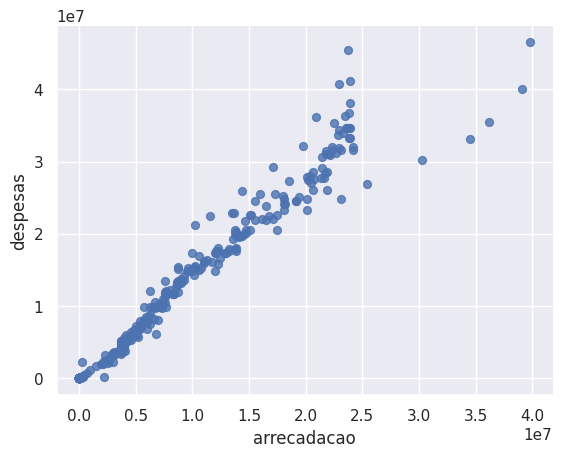

In [ ]:
# @title arrecadacao vs despesas do INSS
df_final.plot(kind='scatter', x='arrecadacao', y='despesas', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Podemos notar um aumento expressivo das despesas do INSS em comparação as arrecadações

In [ ]:
fig = go.Figure()

# Adicionar uma linha para arrecadação
fig.add_trace(go.Scatter(x=df_final['Data'], y=df_final['arrecadacao'], mode='lines', name='Arrecadação'))

# Adicionar uma linha para despesas
fig.add_trace(go.Scatter(x=df_final['Data'], y=df_final['despesas'], mode='lines', name='Despesas'))

# Atualizar layout para incluir controles deslizantes para selecionar um intervalo de datas
fig.update_layout(
    title='Série Temporal de Arrecadação e Despesas',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True),
        type='date'
    )
)

# Mostrar o gráfico
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objs as go

df_final['Data'] = pd.to_datetime(df_final['Data'])

# Adicionar uma coluna de ano
df_final['Ano'] = df_final['Data'].dt.year

# Calcular a diferença anual entre arrecadação e despesas
df_annual = df_final.groupby('Ano').agg({
    'arrecadacao': 'sum',
    'despesas': 'sum'
}).reset_index()

df_annual['Diferenca'] = df_annual['arrecadacao'] - df_annual['despesas']

# Criar gráfico de barras
fig = go.Figure()

# Adicionar a diferença como barras
fig.add_trace(go.Bar(x=df_annual['Ano'], y=df_annual['Diferenca'], name='Diferença'))

# Atualizar layout
fig.update_layout(
    title='Diferença Anual entre Arrecadação e Despesas',
    xaxis=dict(title='Ano'),
    yaxis=dict(title='Diferença'),
    barmode='group'
)

# Mostrar o gráfico
fig.show()


A tabela acima apresenta os gastos, entre os anos de 1982 e 2024, com o regime geral da previdência social. Observa-se que o saldo é negativo em todo o período, ou seja, a arrecadação é menor que os benefícios.

In [ ]:
# Correlação de Pearson: Avalia a relação linear entre duas variáveis contínuas.
# O coeficiente de correlação de Pearson varia de -1 a 1, onde 1 indica uma correlação positiva perfeita, -1 indica uma correlação negativa perfeita e 0 indica ausência de correlação linear.
correlacao_pearson = df_final['arrecadacao'].corr(df_final['despesas'], method='pearson')

# Imprimir o resultado
print("Coeficiente de correlação de Pearson:", correlacao_pearson)


Coeficiente de correlação de Pearson: 0.981944050013509


Um coeficiente de correlação de Pearson de aproximadamente 0.98 indica uma forte correlação positiva entre as duas variáveis. Isso sugere que há uma relação linear forte e positiva entre as duas séries de dados.

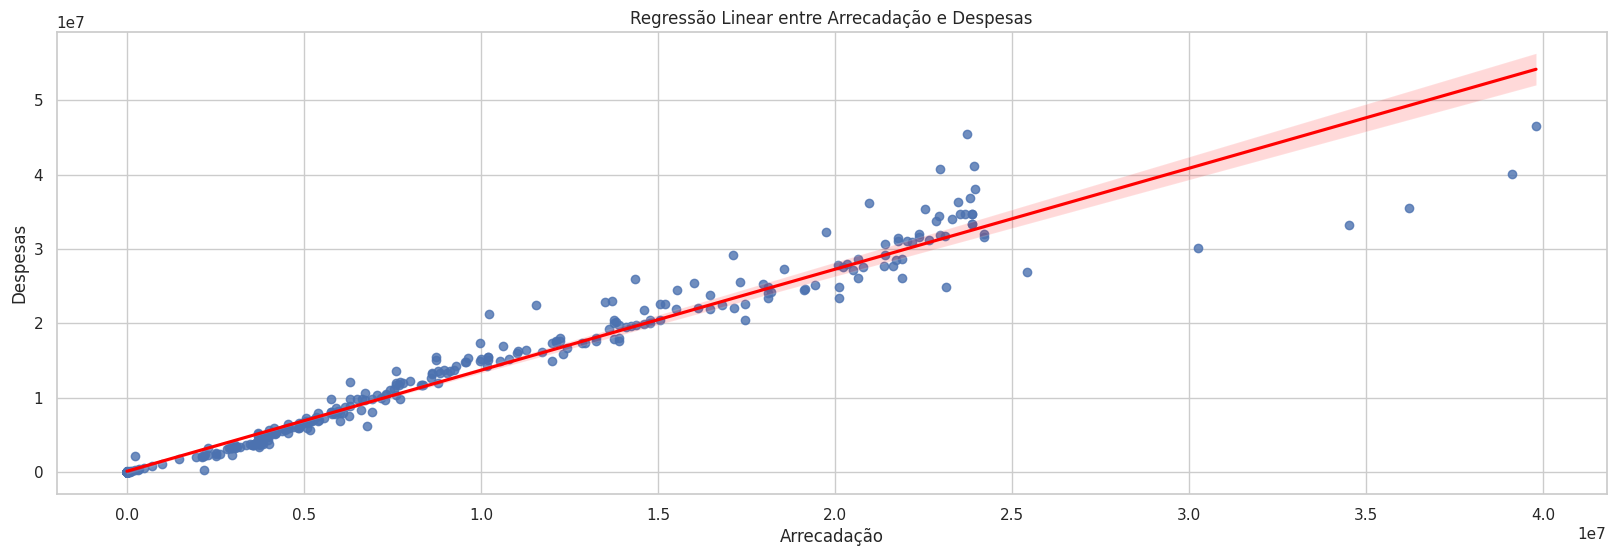

In [ ]:
# Plotar os dados com uma linha de regressão linear
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.regplot(x='arrecadacao', y='despesas', data=df_final, line_kws={'color': 'red'})
plt.title('Regressão Linear entre Arrecadação e Despesas')
plt.xlabel('Arrecadação')
plt.ylabel('Despesas')
plt.show()

# **Modelos**


# Introdução ao Modelo SARIMA


Para prever os valores futuros de arrecadação e despesas da previdência social, utilizaremos o modelo SARIMA (Seasonal AutoRegressive Integrated Moving Average), uma técnica de modelagem de séries temporais que é particularmente eficaz para dados que exibem padrões sazonais. As séries temporais de arrecadação e despesas do INSS apresentam características de sazonalidade, o que torna o modelo SARIMA uma escolha apropriada para capturar e prever esses padrões.

## O Que é o Modelo SARIMA?

SARIMA é uma extensão do modelo ARIMA (AutoRegressive Integrated Moving Average) que incorpora componentes sazonais. O modelo ARIMA é composto por três partes principais:

- **AutoRegressive (AR):** Utiliza a dependência entre uma observação e várias observações defasadas.

- **Integrated (I):** Usa a diferenciação das observações (subtração de uma observação da anterior) para tornar a série temporal estacionária.

- **Moving Average (MA):** Modela a dependência entre uma observação e um erro defasado da média móvel.

O modelo SARIMA adiciona componentes sazonais a cada uma dessas partes:
- Seasonal AutoRegressive (SAR)
- Seasonal Integrated (SI)
- Seasonal Moving Average (SMA)

Dessa forma, o modelo SARIMA é definido pelos parâmetros
(𝑝,𝑑,𝑞)×(𝑃,𝐷,𝑄,𝑠)(p,d,q)×(P,D,Q,s), onde:

- 𝑝: Ordem da parte autoregressiva.
- 𝑑: Número de diferenciações necessárias para tornar a série estacionária.
- 𝑞: Ordem da parte de média móvel.
- 𝑃: Ordem da parte autoregressiva sazonal.
- 𝐷: Número de diferenciações sazonais.
- 𝑄: Ordem da parte de média móvel sazonal.
- 𝑠: Período da sazonalidade (por exemplo, 12 para dados mensais com sazonalidade anual).


## Metodologia

1.   **Verificação da Estacionalidade:**
  - O primeiro passo na modelagem SARIMA é verificar a presença de estacionalidade nos dados. Isso pode ser feito visualizando a série temporal e usando testes estatísticos como o teste de Dickey-Fuller aumentado (ADF) para verificar a estacionariedade.


2.   **Busca dos Melhores Parâmetros:**

  - A escolha dos parâmetros (𝑝,𝑑,𝑞)(p,d,q) e (𝑃,𝐷,𝑄,𝑠)(P,D,Q,s) é crítica para a eficácia do modelo. Utilizaremos técnicas como Random Search e a função auto_arima da biblioteca pmdarima para encontrar os melhores parâmetros de forma automatizada. O auto_arima avalia múltiplas combinações de parâmetros e seleciona aquela que minimiza um critério de informação, como o AIC (Akaike Information Criterion).
3.   **Treinamento e Avaliação do Modelo:**

    - Com os parâmetros otimizados, treinaremos o modelo SARIMA nos dados históricos de arrecadação e despesas. Avaliaremos o desempenho do modelo utilizando métricas apropriadas, como o RMSE (Root Mean Squared Error).
4.   **Plotagem do Resultado:**

    - Por fim, plotaremos as previsões geradas pelo modelo SARIMA, comparando os valores previstos com os valores reais (quando disponíveis) para visualizar a precisão das previsões. Isso nos permitirá fazer inferências sobre as tendências futuras de arrecadação e despesas da previdência social.

# 1.   **Verificação da Estacionalidade:**

In [ ]:
# Converter a coluna 'arrecadacao' em uma série temporal
serie_temporal = df_final['arrecadacao']

# Execute o teste de Dickey-Fuller
resultado_teste = adfuller(serie_temporal)

# Extrair e imprimir os resultados
print('Estatística do teste:', resultado_teste[0])
print('Valor-p:', resultado_teste[1])
print('Valores críticos:', resultado_teste[4])
print('Resultado:', 'Estacionária' if resultado_teste[1] < 0.05 else 'Não estacionária')


Estatística do teste: 0.4236055100563405
Valor-p: 0.982356560105359
Valores críticos: {'1%': -3.4451978474132234, '5%': -2.8680864144212057, '10%': -2.5702569996789792}
Resultado: Não estacionária


In [ ]:
# Converter a coluna 'arrecadacao' em uma série temporal
serie_temporal = df_final['despesas']

# Execute o teste de Dickey-Fuller
resultado_teste = adfuller(serie_temporal)

# Extrair e imprimir os resultados
print('Estatística do teste:', resultado_teste[0])
print('Valor-p:', resultado_teste[1])
print('Valores críticos:', resultado_teste[4])
print('Resultado:', 'Estacionária' if resultado_teste[1] < 0.05 else 'Não estacionária')

Estatística do teste: 5.843820098602954
Valor-p: 1.0
Valores críticos: {'1%': -3.4451642100030084, '5%': -2.8680716196949327, '10%': -2.5702491139112085}
Resultado: Não estacionária


Conforme resultado acima, bases não são estacionárias.
Antes de aplicar o Modelo Arima ou Sarima iremos ajustar a base retirando a média Móvel e validando resultado

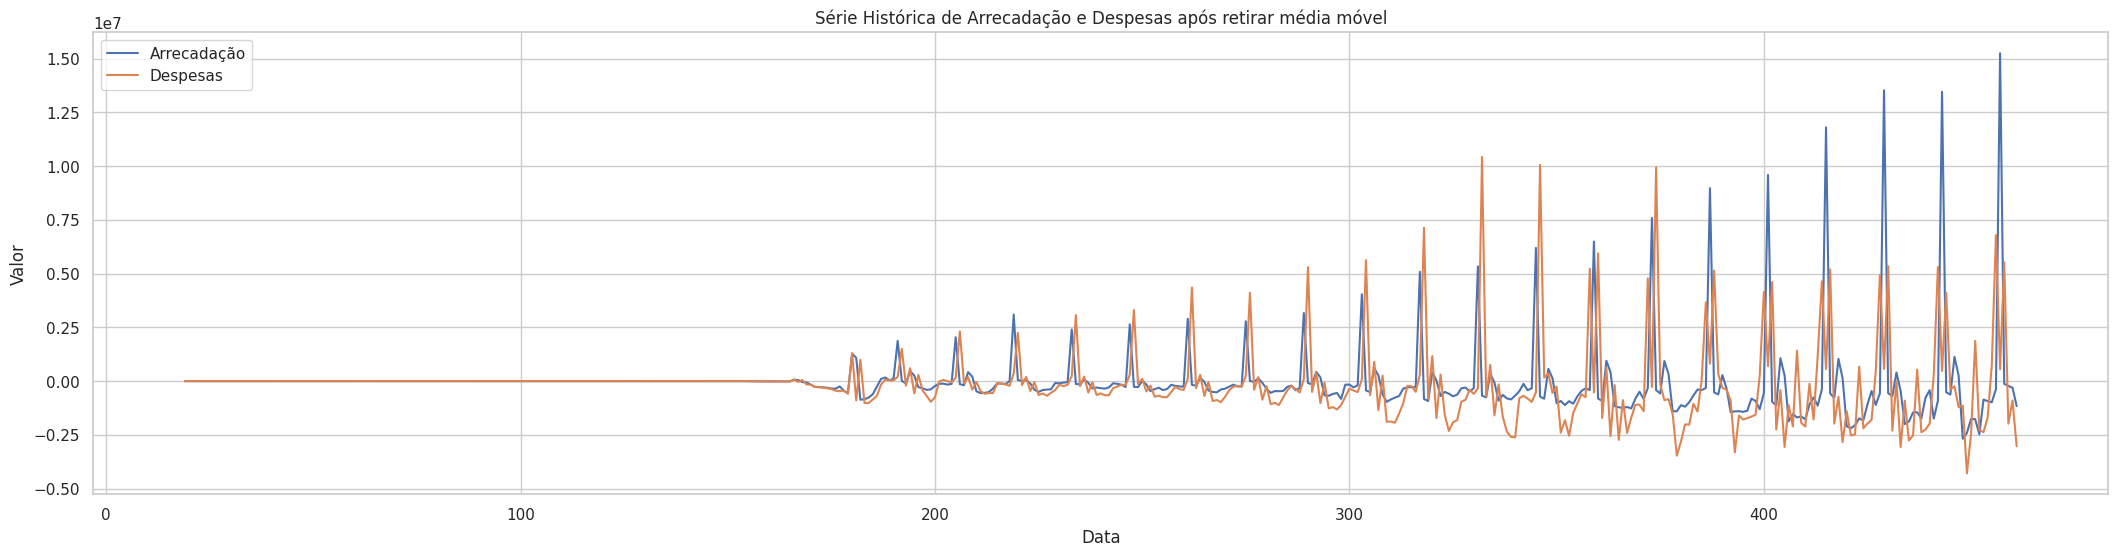

In [ ]:
# Calculando a média móvel para as colunas 'arrecadacao' e 'despesas' com janela de 3 períodos
media_movel_arrecadacao = df_final['arrecadacao'].rolling(window=20).mean()
media_movel_despesas = df_final['despesas'].rolling(window=20).mean()


df_arrecadacao_sem_media_movel = df_final['arrecadacao'].shift(periods=10) - media_movel_arrecadacao
df_despesas_sem_media_movel = df_final['despesas'].shift(periods=11) - media_movel_despesas

# Removendo Linhas NAN
df_arrecadacao_sem_media_movel = df_arrecadacao_sem_media_movel.dropna()
df_despesas_sem_media_movel = df_despesas_sem_media_movel.dropna()

# Plotando a série histórica
plt.figure(figsize=(26, 6))
plt.plot(df_arrecadacao_sem_media_movel, label='Arrecadação')
plt.plot(df_despesas_sem_media_movel, label='Despesas')
plt.title('Série Histórica de Arrecadação e Despesas após retirar média móvel')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

## Após retirada da média móvel verificando novamente Estacionalidade das bases

In [ ]:
# Converter a coluna 'arrecadacao' em uma série temporal
serie_temporal = df_arrecadacao_sem_media_movel

# Execute o teste de Dickey-Fuller
resultado_teste = adfuller(serie_temporal)

# Extrair e imprimir os resultados
print('Estatística do teste:', resultado_teste[0])
print('Valor-p:', resultado_teste[1])
print('Valores críticos:', resultado_teste[4])
print('Resultado:', 'Estacionária' if resultado_teste[1] < 0.05 else 'Não estacionária')

Estatística do teste: -5.381987470736525
Valor-p: 3.6951099740662362e-06
Valores críticos: {'1%': -3.445721386098794, '5%': -2.868316661451884, '10%': -2.5703797268320376}
Resultado: Estacionária


In [ ]:
# Converter a coluna 'despesas' em uma série temporal
serie_temporal = df_despesas_sem_media_movel

# Execute o teste de Dickey-Fuller
resultado_teste = adfuller(serie_temporal)

# Extrair e imprimir os resultados
print('Estatística do teste:', resultado_teste[0])
print('Valor-p:', resultado_teste[1])
print('Valores críticos:', resultado_teste[4])
print('Resultado:', 'Estacionária' if resultado_teste[1] < 0.05 else 'Não estacionária')

Estatística do teste: -3.9117016482697426
Valor-p: 0.001950397403698085
Valores críticos: {'1%': -3.445685337552546, '5%': -2.868300808913956, '10%': -2.570371276889389}
Resultado: Estacionária


Após retirar média Móvel foi possível tornar a base estacionária. Agora precisamos definir os parâmetros do Modelo ARIMA:

p é a ordem do termo auto regressivo.

q é a ordem do termo média móvel.

d é a ordem de diferenciação. — Ligado aos datasets não estacionários.

Ordem = (2,1,2), utilizando a diferenciação para levar à estacionariedade.

Ordem = (2,0,2), retirando a média móvel para garantir a estacionariedade.



# 2.   **Busca dos Melhores Parâmetros:**
### Utilizando Ramdom Search para encontrar os melhores parâmetros para os Modelos:

## Buscando parâmetros para base de **Arrecadação** modelos ARIMA vs SARIMA

In [ ]:
# @title Buscando o melhor parâmetro para o modelo ARIMA
from sklearn.model_selection import ParameterSampler
import numpy as np

# Definindo o espaço de parâmetros para a busca aleatória
param_grid = {'p': list(range(2, 30)), 'd': [0], 'q': list(range(2, 30))}

# Gerando uma lista de parâmetros para a busca aleatória
param_list = list(ParameterSampler(param_grid, n_iter=10, random_state=42))

# Inicializando a variável para armazenar o melhor RMSE e os melhores parâmetros
best_rmse_arima = np.inf
best_order_arima = None

# Loop sobre a lista de parâmetros
for params in param_list:
    order = (params['p'], params['d'], params['q'])
    try:
        # Criando o modelo ARIMA com a ordem atual
        modelo_arima = ARIMA(df_arrecadacao_sem_media_movel, order=order)
        # Ajustando o modelo aos dados
        arima_fit = modelo_arima.fit()
        # Calculando o RMSE
        rmse = np.sqrt(mean_squared_error(arima_fit.fittedvalues, df_arrecadacao_sem_media_movel.values))
        # Atualizando o melhor RMSE e os melhores parâmetros, se necessário
        if rmse < best_rmse_arima:
            best_rmse_arima = rmse
            best_order_arima = order
    except:
        continue

print('Melhor RMSE: ', best_rmse_arima)
print('Melhor ordem ARIMA: ', best_order_arima)

Melhor RMSE:  301437.347537002
Melhor ordem ARIMA:  (24, 0, 23)


In [ ]:
# @title Buscando o melhor parâmetro para o modelo SARIMA

# Definindo o espaço de parâmetros para a busca aleatória
param_grid = {
    'p': list(range(2, 30)),  # Ordem AR
    'd': [0],  # Diferenciação
    'q': list(range(2, 30)),  # Ordem MA
    'P': list(range(2)),  # Ordem AR sazonal
    'D': [0],  # Diferenciação sazonal
    'Q': list(range(2)),  # Ordem MA sazonal
    'm': [12]  # Período sazonal
}

# Gerando uma lista de parâmetros para a busca aleatória
param_list = list(ParameterSampler(param_grid, n_iter=10, random_state=42))

# Inicializando a variável para armazenar o melhor RMSE e os melhores parâmetros
best_rmse_sarima = np.inf
best_order_sarima = None

# Loop sobre a lista de parâmetros
for params in param_list:
    order = (params['p'], params['d'], params['q'])
    seasonal_order = (params['P'], params['D'], params['Q'], params['m'])
    try:
        # Criando o modelo SARIMA com a ordem atual
        modelo_sarima = SARIMAX(df_arrecadacao_sem_media_movel, order=order, seasonal_order=seasonal_order)
        # Ajustando o modelo aos dados
        sarima_fit = modelo_sarima.fit()
        # Calculando o RMSE
        rmse = np.sqrt(mean_squared_error(sarima_fit.fittedvalues, df_arrecadacao_sem_media_movel))
        # Atualizando o melhor RMSE e os melhores parâmetros, se necessário
        if rmse < best_rmse_sarima:
            best_rmse_sarima = rmse
            best_order_sarima = order
            best_seasonal_order_sarima = seasonal_order
    except:
        continue

print('Melhor RMSE:', best_rmse_sarima)
print('Melhor ordem SARIMA:', best_order_sarima)
print('Melhor ordem sazonal:', best_seasonal_order_sarima)


Melhor RMSE: 305600.92732909584
Melhor ordem SARIMA: (18, 0, 20)
Melhor ordem sazonal: (0, 0, 0, 12)


In [ ]:
import math
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

df_arrecadacao_sem_media_movel.dropna(inplace=True)

# Criando o modelo ARIMA/SARIMA
modelo_arima = ARIMA(df_arrecadacao_sem_media_movel, order=best_order_arima)
modelo_sarima = SARIMAX(df_arrecadacao_sem_media_movel, order=best_order_sarima, seasonal_order=best_seasonal_order_sarima)

# Ajustando o modelo aos dados
df_arrecadacao_arima_fit = modelo_arima.fit()
df_arrecadacao_sarima_fit = modelo_sarima.fit()

# Obtendo os valores ajustados
arima_fittedvalues = df_arrecadacao_arima_fit.fittedvalues
sarima_fittedvalues = df_arrecadacao_sarima_fit.fittedvalues

# Criando a figura
fig = go.Figure()

# Adicionando a série temporal original
fig.add_trace(go.Scatter(x=df_arrecadacao_sem_media_movel.index, y=df_arrecadacao_sem_media_movel,
                         mode='lines', name='Arrecadação Real', line=dict(color='blue')))

# Adicionando os valores ajustados pelo modelo ARIMA
fig.add_trace(go.Scatter(x=arima_fittedvalues.index, y=arima_fittedvalues,
                         mode='lines', name='ARIMA Ajustado', line=dict(color='red')))

# Adicionando os valores ajustados pelo modelo SARIMA
fig.add_trace(go.Scatter(x=sarima_fittedvalues.index, y=sarima_fittedvalues,
                         mode='lines', name='SARIMA Ajustado', line=dict(color='green')))

# Adicionando o título e os rótulos dos eixos
fig.update_layout(title='Analisando Modelo ARIMA vs SARIMA sobre Arrecadação',
                  xaxis_title='Tempo',
                  yaxis_title='Arrecadação',
                  width=1300, height=600)

# Exibindo a figura
fig.show()

## Buscando parâmetros para base de **despesas** usando o modelo ARIMA

In [ ]:
# Definindo o espaço de parâmetros para a busca aleatória
param_grid = {'p': list(range(2, 30)), 'd': [0], 'q': list(range(2, 30))}

# Gerando uma lista de parâmetros para a busca aleatória
param_list = list(ParameterSampler(param_grid, n_iter=10, random_state=42))

# Inicializando a variável para armazenar o melhor RMSE e os melhores parâmetros
best_rmse_arima = np.inf
best_order_arima = None

# Loop sobre a lista de parâmetros
for params in param_list:
    order = (params['p'], params['d'], params['q'])
    try:
        # Criando o modelo ARIMA com a ordem atual
        modelo_arima = ARIMA(df_despesas_sem_media_movel, order=order)
        # Ajustando o modelo aos dados
        arima_fit = modelo_arima.fit()
        # Calculando o RMSE
        rmse = np.sqrt(mean_squared_error(arima_fit.fittedvalues, df_despesas_sem_media_movel.values))
        # Atualizando o melhor RMSE e os melhores parâmetros, se necessário
        if rmse < best_rmse_arima:
            best_rmse_arima = rmse
            best_order_arima = order
    except:
        continue

print('Melhor RMSE: ', best_rmse_arima)
print('Melhor ordem: ', best_order_arima)

Melhor RMSE:  627425.3350895935
Melhor ordem:  (24, 0, 23)


In [ ]:
# @title Buscando o melhor parâmetro para o modelo SARIMA
# Definindo o espaço de parâmetros para a busca aleatória
param_grid = {
    'p': list(range(2, 30)),  # Ordem AR
    'd': [0],  # Diferenciação
    'q': list(range(2, 30)),  # Ordem MA
    'P': list(range(2)),  # Ordem AR sazonal
    'D': [0],  # Diferenciação sazonal
    'Q': list(range(2)),  # Ordem MA sazonal
    'm': [12]  # Período sazonal
}

# Gerando uma lista de parâmetros para a busca aleatória
param_list = list(ParameterSampler(param_grid, n_iter=10, random_state=42))

# Inicializando a variável para armazenar o melhor RMSE e os melhores parâmetros
best_rmse_sarima = np.inf
best_order_sarima = None

# Loop sobre a lista de parâmetros
for params in param_list:
    order = (params['p'], params['d'], params['q'])
    seasonal_order = (params['P'], params['D'], params['Q'], params['m'])
    try:
        # Criando o modelo SARIMA com a ordem atual
        modelo_sarima = SARIMAX(df_despesas_sem_media_movel, order=order, seasonal_order=seasonal_order)
        # Ajustando o modelo aos dados
        sarima_fit = modelo_sarima.fit()
        # Calculando o RMSE
        rmse = np.sqrt(mean_squared_error(sarima_fit.fittedvalues, df_despesas_sem_media_movel))
        # Atualizando o melhor RMSE e os melhores parâmetros, se necessário
        if rmse < best_rmse_sarima:
            best_rmse_sarima = rmse
            best_order_sarima = order
            best_seasonal_order_sarima = seasonal_order
    except:
        continue

print('Melhor RMSE:', best_rmse_sarima)
print('Melhor ordem SARIMA:', best_order_sarima)
print('Melhor ordem sazonal:', best_seasonal_order_sarima)


Melhor RMSE: 638825.990832589
Melhor ordem SARIMA: (18, 0, 20)
Melhor ordem sazonal: (0, 0, 0, 12)


In [ ]:
df_despesas_sem_media_movel.dropna(inplace=True)

# Criando o modelo ARIMA/SARIMA
modelo_arima = ARIMA(df_despesas_sem_media_movel, order=best_order_arima)
modelo_sarima = SARIMAX(df_despesas_sem_media_movel, order=best_order_sarima, seasonal_order=best_seasonal_order_sarima)

# Ajustando o modelo aos dados
df_despesas_arima_fit = modelo_arima.fit()
df_despesas_sarima_fit = modelo_sarima.fit()

# Obtendo os valores ajustados
arima_fittedvalues = df_despesas_arima_fit.fittedvalues
sarima_fittedvalues = df_despesas_sarima_fit.fittedvalues

# Criando a figura
fig = go.Figure()

# Adicionando a série temporal original
fig.add_trace(go.Scatter(x=df_despesas_sem_media_movel.index, y=df_despesas_sem_media_movel,
                         mode='lines', name='despesas Real', line=dict(color='blue')))

# Adicionando os valores ajustados pelo modelo ARIMA
fig.add_trace(go.Scatter(x=arima_fittedvalues.index, y=arima_fittedvalues,
                         mode='lines', name='ARIMA Ajustado', line=dict(color='red')))

# Adicionando os valores ajustados pelo modelo SARIMA
fig.add_trace(go.Scatter(x=sarima_fittedvalues.index, y=sarima_fittedvalues,
                         mode='lines', name='SARIMA Ajustado', line=dict(color='green')))

# Adicionando o título e os rótulos dos eixos
fig.update_layout(title='Analisando Modelo ARIMA vs SARIMA sobre despesas',
                  xaxis_title='Tempo',
                  yaxis_title='despesas',
                  width=1300, height=600)

# Exibindo a figura
fig.show()


# 3.   **Treinamento e Avaliação do Modelo:**

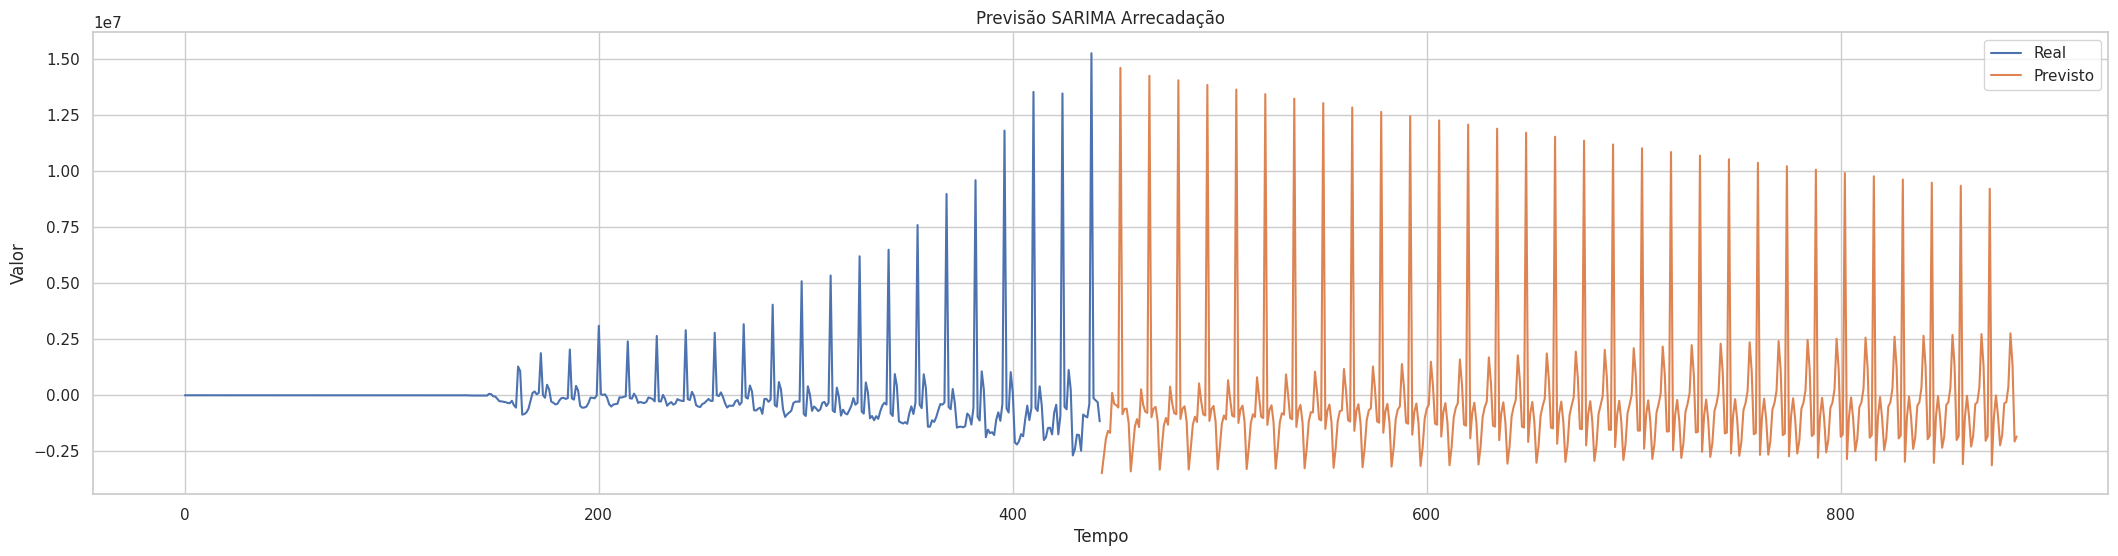

In [ ]:
# Fazendo previsões com o modelo SARIMA
previsao_arrecadacao_sarima = df_arrecadacao_sarima_fit.forecast(steps=len(df_arrecadacao_sem_media_movel))

# Gráfico de valores reais vs. previstos
plt.figure(figsize=(26, 6))
plt.plot(df_arrecadacao_sem_media_movel.values, label='Real')
plt.plot(previsao_arrecadacao_sarima, label='Previsto')
plt.legend()
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.title('Previsão SARIMA Arrecadação')
plt.show()


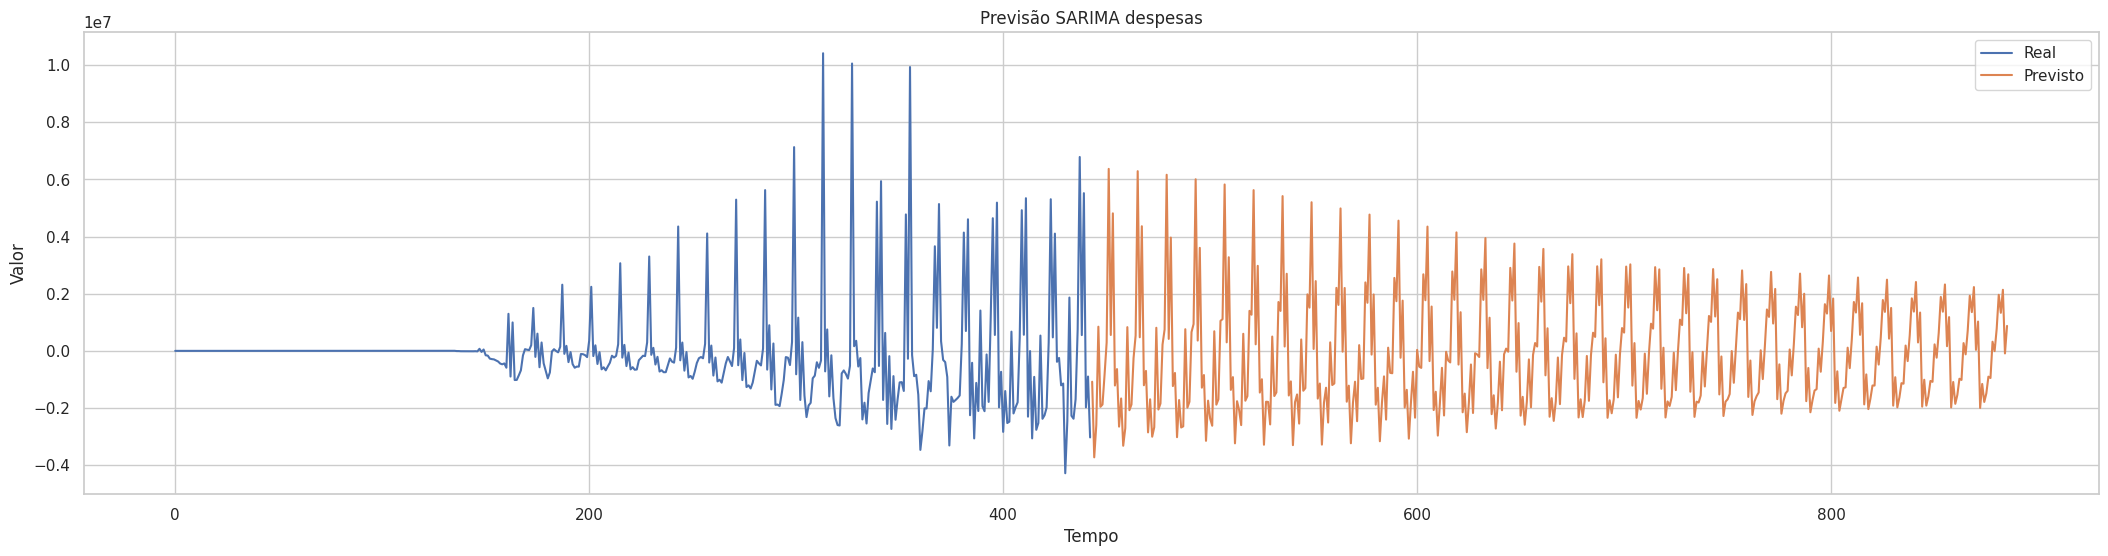

In [ ]:
# Fazendo previsões com o modelo SARIMA
previsao_despesas_sarima = df_despesas_sarima_fit.forecast(steps=len(df_despesas_sem_media_movel))

# Gráfico de valores reais vs. previstos
plt.figure(figsize=(26, 6))
plt.plot(df_despesas_sem_media_movel.values, label='Real')
plt.plot(previsao_despesas_sarima, label='Previsto')
plt.legend()
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.title('Previsão SARIMA despesas')
plt.show()


# **Resultados**

Apresente aqui um resumo dos resultados obtidos, como métricas, tabelas comparativas etc.

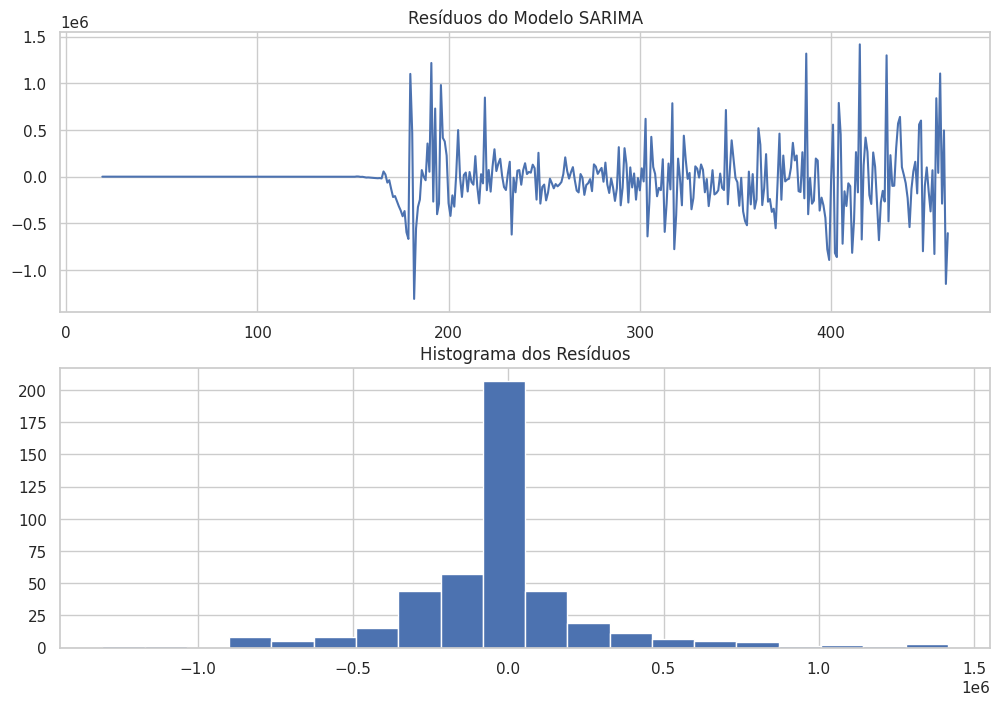

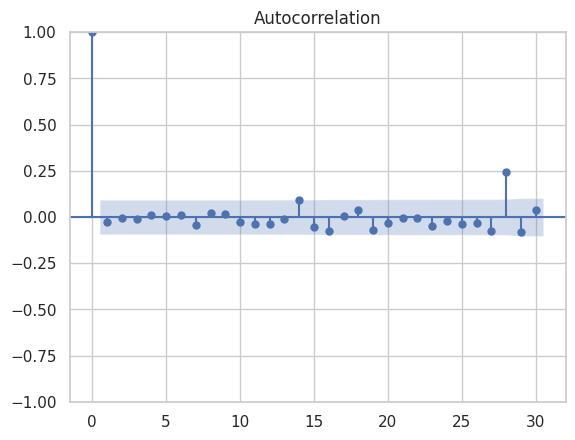

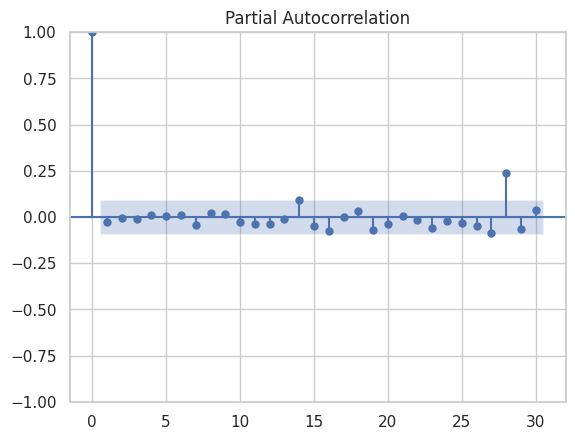

Ljung-Box Test:
     lb_stat  lb_pvalue
10  1.942486   0.996762


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro

# Verificar resíduos
residuos = df_arrecadacao_sarima_fit.resid

# Plotar os resíduos
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(residuos)
plt.title('Resíduos do Modelo SARIMA')
plt.subplot(212)
plt.hist(residuos, bins=20)
plt.title('Histograma dos Resíduos')
plt.show()

# Plotar ACF e PACF dos resíduos
plot_acf(residuos, lags=30)
plt.show()

plot_pacf(residuos, lags=30)
plt.show()

# Teste de Ljung-Box
ljung_box_result = acorr_ljungbox(residuos, lags=[10], return_df=True)
print("Ljung-Box Test:")
print(ljung_box_result)


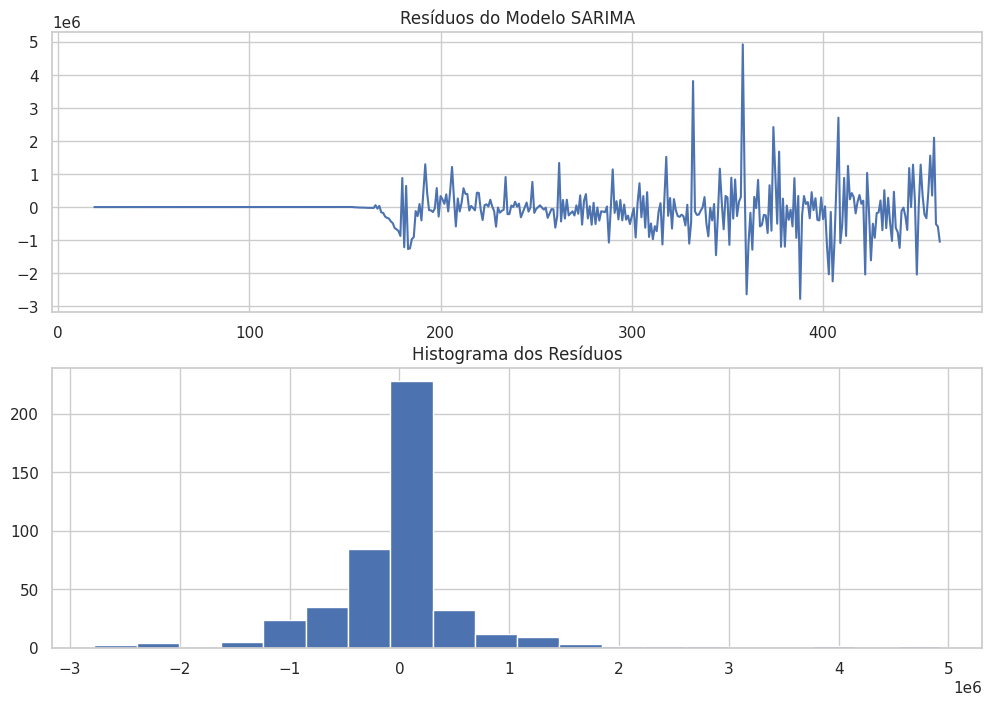

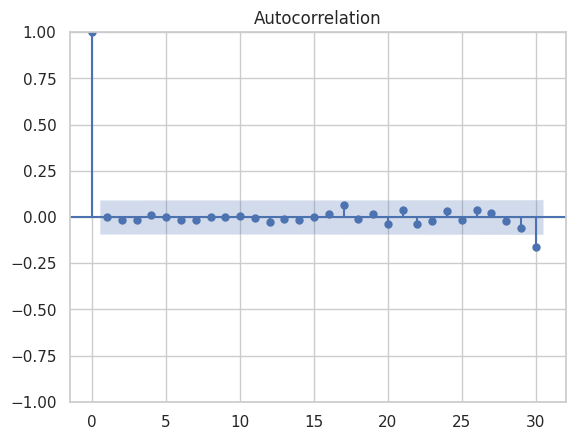

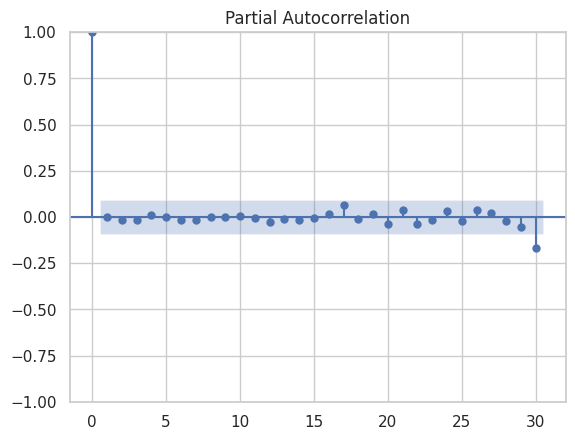

Ljung-Box Test:
     lb_stat  lb_pvalue
10  0.533117   0.999991


In [ ]:
# Verificar resíduos
residuos = df_despesas_sarima_fit.resid

# Plotar os resíduos
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(residuos)
plt.title('Resíduos do Modelo SARIMA')
plt.subplot(212)
plt.hist(residuos, bins=20)
plt.title('Histograma dos Resíduos')
plt.show()

# Plotar ACF e PACF dos resíduos
plot_acf(residuos, lags=30)
plt.show()

plot_pacf(residuos, lags=30)
plt.show()

# Teste de Ljung-Box
ljung_box_result = acorr_ljungbox(residuos, lags=[10], return_df=True)
print("Ljung-Box Test:")
print(ljung_box_result)


# **Dicussão e Conclusão**

Nosso país enfrenta desafios significativos relacionados ao seu sistema previdenciário, principalmente devido ao envelhecimento da população e à diminuição da taxa de natalidade. O objetivo deste projeto foi desenvolver e avaliar modelos de séries temporais para prever arrecadação e despesas do INSS, utilizando dados históricos e técnicas de modelagem.

A análise exploratória dos dados (EDA) foi uma etapa importante para entender a estrutura, características e padrões dos dados.

Carregamos os dados da população e segmentamos por grupos etários, focando nas faixas etárias aptas a contribuir com o INSS (16 a 65 anos).
Calculamos as estatísticas descritivas para diferentes grupos etários e a população total.

Plotamos gráficos de linha para visualizar a população total e a população apta a contribuir ao longo dos anos.

Identificamos um crescimento gradual da população total, porém com uma taxa de crescimento reduzida nas últimas décadas.

Realizamos o teste de Dickey-Fuller Aumentado (ADF) para verificar a estacionaridade da série temporal da população total. Os resultados indicaram que a série não é estacionária, sugerindo a necessidade de diferenciação ou modelagem com sazonalidade.

Para prever as arrecadações e despesas do INSS, comparamos dois modelos de séries temporais: ARIMA e SARIMA.

**Modelo ARIMA:**
ARIMA é um modelo autorregressivo integrado de médias móveis, adequado para séries temporais sem sazonalidade.
Embora o modelo ARIMA possa capturar padrões temporais, ele não considera componentes sazonais explícitos, o que pode limitar sua eficácia em séries com sazonalidade significativa.

**Modelo SARIMA:**
SARIMA, ou ARIMA sazonal, estende o modelo ARIMA ao incluir componentes sazonais. Isso é crucial para séries temporais que apresentam padrões repetitivos ao longo do tempo, como ciclos anuais.

Implementamos e ajustamos o modelo SARIMA para arrecadações e despesas, e verificamos a adequação dos resíduos para garantir a validade do modelo.
Após ajustar os modelos, analisamos os resíduos para garantir que não houvesse padrões remanescentes não capturados pelo modelo:

Resíduos do Modelo SARIMA:
Plotamos os resíduos e verificamos a normalidade por meio de histogramas.
Utilizamos gráficos de autocorrelação (ACF) e autocorrelação parcial (PACF) para identificar qualquer padrão nos resíduos.

Realizamos o teste de Ljung-Box para verificar a autocorrelação nos resíduos. Os resultados indicaram que os resíduos são essencialmente ruído branco, sugerindo um bom ajuste do modelo.

Os modelos SARIMA demonstraram ser mais adequados para prever as arrecadações e despesas do INSS devido à sua capacidade de capturar padrões sazonais, que são uma característica significativa das séries temporais analisadas. Os resíduos dos modelos SARIMA não apresentaram autocorrelação significativa, indicando um bom ajuste.

**Qualidades e Limitações do Trabalho**

Qualidades:

- Utilização de técnicas avançadas de modelagem (ARIMA e SARIMA).
- Verificação rigorosa dos resíduos para garantir a validade dos modelos.
- Análise detalhada dos padrões demográficos e sua relação com a sustentabilidade da Previdência Social.

Limitações:

- Dependência de dados históricos, que podem não capturar mudanças futuras significativas nas políticas previdenciárias ou eventos econômicos.
- Possível necessidade de modelos mais complexos para captar todas as variáveis influentes no sistema previdenciário.

Potenciais Melhorias:
- Incorporar variáveis macroeconômicas (como PIB, taxa de desemprego) para melhorar as previsões.
- Realizar simulações de cenários para avaliar o impacto de diferentes políticas previdenciárias.


# **Referências**

Ferramentas a serem utilizadas:

Pandas, Numpy, MatplotLib, Scikit-learn, Satsmodels.

Artigo:

[1] Costa, Cássia Kely Favoretto. Nome. Envelhecimento populacional e a necessidade de reforma da saúde pública e da previdência social brasileiras. A Economia em Revista. Maringá, PR. Vol. 19, n. 2 (dez. 2011), p. 121-131. Disponível em: https://lume.ufrgs.br/handle/10183/205087. Acesso em: 06/04/2024

[2] Cavalcante, Priscilla Raisa Gama, Bruna. Polemica- A necessidade da reforma da previdência social: O deficit nos cofres públicos e a taxa de natalidade a luz da PEC 287/2016. NÁPOLIS-GO. Disponível em: http://repositorio.aee.edu.br/handle/aee/1191. Acesso em: 06/04/2024

[3] Caetano, Marcelo. Envelhecimento da População e seguridade social. Coleção previdência Social, volume 37, 2018. Disponível em: http://sa.previdencia.gov.br/site/2018/06/colprev37.pdf. Acesso em: 06/04/2024

[4] Vasconcelos, Alexandre. TRANSIÇÃO DEMOGRÁFICA NO BRASIL E O IMPACTO NA PREVIDÊNCIA SOCIAL. Boletim Economia Empírica, volume 1, número 2. Disponível em: https://www.portaldeperiodicos.idp.edu.br/bee/article/view/4112/1787. Acesso em: 06/04/2024


In [ ]:
#@title **Avaliação**
Problema = 10 #@param {type:"slider", min:0, max:10, step:1}

Metodologia = 9 #@param {type:"slider", min:0, max:10, step:1}

Resultados = 8 #@param {type:"slider", min:0, max:10, step:1}

Artigo = 7 #@param {type:"slider", min:0, max:10, step:1}

Conclusao = 7 #@param {type:"slider", min:0, max:10, step:1}

Apresentacao_geral = 7 #@param {type:"slider", min:0, max:10, step:1}










In [ ]:
#@title **Nota Final**
nota = 0.1*Problema + 0.3*Metodologia + 0.2*Resultados + 0.2*Artigo + 0.2*Conclusao

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_nome.append(lista[0]);")

alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 8.1



,nome,nota
0,Douglas Pereira de Araújo,8.1
1,Gabriel Sicari Moretti,8.1
2,João Vitor da Silva Pereira,8.1
3,Matheus Aparecido Ramos Lourenço,8.1
4,Rafael Castro dos Santos,8.1
